# Training Genome Selection Strategy

We use **27 curated reference genomes** selected for maximum diversity and quality.

## 1. Taxonomic Diversity
- **Proteobacteria** (8 genomes): Gram-negative, diverse metabolism
- **Firmicutes** (7 genomes): Gram-positive, low GC
- **Actinobacteria** (4 genomes): High GC content
- **Archaea** (5 genomes): Distinct codon usage
- **Mixed** (3 genomes): Edge cases, extreme GC

## 2. Genome Characteristics
- **GC content range**: 25% - 75%
- **Genome size**: 1.5 Mbp - 10 Mbp
- **Gene density**: 85% - 95%
- **Codon usage**: Diverse patterns

## 3. Annotation Quality
- All from **NCBI RefSeq** (highest quality)
- **Complete genomes** (not drafts)
- Well-studied model organisms where possible
- Manual curation verified

## 4. Practical Considerations
- Represent common human/environmental pathogens
- Include extremophiles for edge cases
- Balance between model organisms and diversity

---

### Why Curated > Random?
 **Reproducibility**: Same training set = same model  
 **Balance**: Prevents taxonomic bias  
 **Quality**: High-confidence annotations  
 **Interpretability**: Can analyze per-group performance  
 **Standard Practice**: Matches industry tools (Prodigal, GeneMark)

---

**Reference:** Similar approach used by Prodigal (Hyatt et al. 2010)

In [5]:

# Taxonomic groups
GROUP_TAXIDS = {
    "Proteobacteria": 1224,
    "Firmicutes": 1239,
    "Actinobacteria": 201174,
    "Archaea": 2157,
}

# Curated training genomes with metadata
TRAINING_GENOMES = {
    # Proteobacteria (Gram-negative) - 8 genomes
    'NC_011751.1': {'name': 'Escherichia coli', 'gc': 0.51, 'size': 4.6},
    'NC_017626.1': {'name': 'Salmonella enterica', 'gc': 0.52, 'size': 4.8},
    'NC_009004.1': {'name': 'Pseudomonas aeruginosa', 'gc': 0.66, 'size': 6.3},
    'NC_007912.1': {'name': 'Helicobacter pylori', 'gc': 0.39, 'size': 1.6},
    'NC_002946.2': {'name': 'Neisseria meningitidis', 'gc': 0.52, 'size': 2.2},
    'NC_004547.2': {'name': 'Vibrio cholerae', 'gc': 0.48, 'size': 4.0},
    'NC_007005.1': {'name': 'Xanthomonas campestris', 'gc': 0.65, 'size': 5.1},
    'NC_009656.1': {'name': 'Acinetobacter baumannii', 'gc': 0.39, 'size': 3.9},
    
    # Firmicutes (Gram-positive, low GC) - 7 genomes
    'NC_014479.1': {'name': 'Bacillus subtilis', 'gc': 0.43, 'size': 4.2},
    'NC_020244.1': {'name': 'Staphylococcus aureus', 'gc': 0.33, 'size': 2.8},
    'NC_003212.1': {'name': 'Listeria monocytogenes', 'gc': 0.38, 'size': 2.9},
    'NC_002570.2': {'name': 'Clostridium perfringens', 'gc': 0.29, 'size': 3.0},
    'NC_007795.1': {'name': 'Streptococcus pyogenes', 'gc': 0.38, 'size': 1.9},
    'NC_004461.1': {'name': 'Lactococcus lactis', 'gc': 0.35, 'size': 2.4},
    'NC_002737.2': {'name': 'Enterococcus faecalis', 'gc': 0.37, 'size': 3.2},
    
    # Actinobacteria (High GC) - 4 genomes
    'NC_008595.1': {'name': 'Mycobacterium tuberculosis', 'gc': 0.66, 'size': 4.4},
    'NC_002755.2': {'name': 'Mycobacterium leprae', 'gc': 0.58, 'size': 3.3},
    'NC_009338.1': {'name': 'Corynebacterium diphtheriae', 'gc': 0.53, 'size': 2.5},
    'NC_014363.1': {'name': 'Streptomyces coelicolor', 'gc': 0.72, 'size': 8.7},
    
    # High GC / Edge cases - 3 genomes
    'NC_003888.3': {'name': 'Streptomyces avermitilis', 'gc': 0.71, 'size': 9.0},
    'NC_009921.1': {'name': 'Frankia sp.', 'gc': 0.73, 'size': 7.5},
    'NC_008148.1': {'name': 'Bifidobacterium longum', 'gc': 0.60, 'size': 2.5},
    
    # Archaea - 5 genomes
    'NC_013967.1': {'name': 'Haloarcula marismortui', 'gc': 0.62, 'size': 4.3},
    'NC_015666.1': {'name': 'Methanococcus maripaludis', 'gc': 0.33, 'size': 1.7},
    'NC_007796.1': {'name': 'Methanospirillum hungatei', 'gc': 0.45, 'size': 3.5},
    'NC_013790.1': {'name': 'Methanobrevibacter smithii', 'gc': 0.31, 'size': 1.9},
    'NC_000909.1': {'name': 'Methanocaldococcus jannaschii', 'gc': 0.31, 'size': 1.7},
}

print(f"Total training genomes: {len(TRAINING_GENOMES)}")
print(f"GC range: {min(g['gc'] for g in TRAINING_GENOMES.values()):.2f} - "
      f"{max(g['gc'] for g in TRAINING_GENOMES.values()):.2f}")
print(f"Size range: {min(g['size'] for g in TRAINING_GENOMES.values()):.1f} - "
      f"{max(g['size'] for g in TRAINING_GENOMES.values()):.1f} Mbp")

Total training genomes: 27
GC range: 0.29 - 0.73
Size range: 1.6 - 9.0 Mbp


# Hybrid Deep Learning Model Variants

This notebook will systematically test multiple hybrid DL architectures to find the optimal configuration for gene prediction refinement.

---

## Model Architectures

All models use the same **hybrid architecture**:
- **CNN Branch**: Learns sequence patterns from raw DNA (1500bp one-hot encoded)
- **Dense Branch**: Uses 31 traditional features (codon, IMM, RBS, length, etc.)
- **Fusion Layer**: Combines both branches for final classification

---

## Experimental Variants

We will train and compare the following configurations:

### **Variant 1: Binary Final Filter**
- **When Applied**: After step 7 (same as Variant 1)
- **Input**: ~5,000 final gene predictions per genome
- **Output Classes**: 
  - `0`: FALSE_POSITIVE
  - `1`: REAL_GENE
- **Filtering Strategy**: Keep if probability > threshold
- **Goal**: Simple binary decision for precision


### **Variant 4: Binary Initial Filter**
- **When Applied**: After step 3 (same as Variant 3)
- **Input**: ~50,000 ORFs per genome
- **Output Classes**: Same as Variant 2
- **Filtering Strategy**: Keep if probability > threshold
- **Goal**: Simple early filtering

---

## Comparison Matrix

| Variant | Model Type | Position | Input Size | Classes | Flexibility |
|---------|-----------|----------|------------|---------|-------------|
| **1** | Binary | Final | ~5k | 2 | Low (single threshold) |
| **2** | Binary | Initial | ~50k | 2 | Low |

---

## Success Metrics

For each variant, we will measure on **validation genomes**:

- **Sensitivity (Recall)**: TP / (TP + FN) - Don't miss real genes
- **Precision**: TP / (TP + FP) - Minimize false positives
- **F1 Score**: Harmonic mean of sensitivity and precision
- **Number of Predictions**: Final gene count
- **Computational Cost**: Training time, inference time

**Target Performance:**
- Baseline (no hybrid DL): Sens ~75%, Prec ~65%, F1 ~69%
- Goal: F1 > 75% (at least +6% improvement)

---
**Conservative (High Precision):**
```python

In [ ]:
# file: src/test_training_genome.py

from pathlib import Path
import sys

# --- Setup imports ---
sys.path.insert(0, str(Path(__file__).resolve().parent.parent))  # add parent dir

from hybrid_predictor import predict_ncbi_genome
from src.config import TRAINING_GENOMES


def inspect_prediction_features(predictions: list, genome_id: str):
    """Inspect and report available features in first prediction."""
    if not predictions:
        print("\n[!] No predictions found - check pipeline!")
        return

    first_pred = predictions[0]

    required_base = [
        'sequence',  # For CNN
        'codon_score_norm', 'imm_score_norm', 'rbs_score_norm',
        'length_score_norm', 'start_score_norm', 'combined_score'
    ]

    required_additional = [
        'gc_content', 'gc_skew', 'at_skew', 'purine_content',
        'codon_adaptation_index', 'effective_num_codons', 'codon_bias_index',
        'length_bp', 'length_codons', 'length_log',
        'start_codon_type', 'has_kozak_like', 'stop_codon_type', 
        'has_hairpin_near_stop',
        'hydrophobicity_mean', 'hydrophobicity_std', 'charge_mean',
        'aromatic_fraction', 'small_fraction', 'polar_fraction',
        'overlap_with_others', 'distance_to_nearest', 'gene_density_region',
        'is_nested', 'num_alternative_starts'
    ]

    has_base = [f for f in required_base if f in first_pred]
    has_additional = [f for f in required_additional if f in first_pred]
    missing = [f for f in required_additional if f not in first_pred]

    print(f"\n{'='*80}")
    print(f"FEATURE INSPECTION FOR: {genome_id}")
    print(f"{'='*80}")
    print(f"✓ Base features: {len(has_base)}/{len(required_base)}")
    print(f"✓ Additional features: {len(has_additional)}/{len(required_additional)}")
    print(f"⚠ Missing features: {len(missing)}")

    if missing:
        print("\nMissing feature names:")
        for feat in missing:
            print(f"  - {feat}")
        print(f"\n→ Next: Use TraditionalFeatureExtractor to add missing features")
    else:
        print("\n✓ All required features are present! Ready for training data generation.")


def run_training_genome_test(email: str):
    """Download one training genome from NCBI and run full hybrid predictor pipeline."""
    print("=" * 80)
    print("TEST PIPELINE ON SINGLE TRAINING GENOME")
    print("=" * 80)

    genome_id = next(iter(TRAINING_GENOMES))
    genome_info = TRAINING_GENOMES[genome_id]

    print(f"\nGenome: {genome_id}")
    print(f"Organism: {genome_info['name']}")
    print(f"GC%: {genome_info['gc']}")
    print(f"Size: {genome_info['size']} Mbp")

    # --- Run hybrid predictor directly ---
    predictions = predict_ncbi_genome(accession=genome_id, email=email)

    # --- Inspect result ---
    inspect_prediction_features(predictions, genome_id)
    return predictions

if __name__ == "__main__":
   final_predictions= run_training_genome_test(email="your.email@example.com")


TEST PIPELINE ON SINGLE TRAINING GENOME

Test genome: NC_011751.1
Organism: Escherichia coli
GC%: 0.51
Size: 4.6 Mbp

DOWNLOADING FROM NCBI
Accession: NC_011751.1
Email: your.email@example.com

  Fetching sequence from NCBI...
  Downloaded: 5,350,781 bytes
  ✓ Download successful!


Loading sequence from: c:\Users\User\Desktop\Bacterial Gene Prediction & Comparison Project\data\full_dataset\NC_011751.1.fasta
✓ Loaded: 5,202,090 bp

RUNNING PIPELINE: NC_011751.1

STEP 1: FIND ORFs
Detecting ORFs and calculating RBS...
Complete: 196,142 ORFs detected with RBS scores
✓ Found 196,142 ORFs

STEP 2: CREATE TRAINING SET
✓ Training set: 1,243 ORFs

STEP 3: CREATE INTERGENIC SET
✓ Intergenic regions: 533

STEP 4: BUILD SCORING MODELS
Building traditional scoring models...
  Building codon usage models...
  Building IMM models...
✓ All models built in 3.5s
  IMM order: 7
  Training sequences: 1243 (1,936,119 bp)
  Intergenic sequences: 533 (168,432 bp)
✓ Models built

STEP 5: SCORE ALL ORFs
Scor

In [7]:
# Simple feature inspection

print("="*80)
print("FEATURES IN FINAL PREDICTIONS")
print("="*80)

if final_predictions:
    first_pred = final_predictions[0]
    
    print(f"\nTotal fields: {len(first_pred)}")
    print(f"\nAll fields in prediction:")
    
    for key in sorted(first_pred.keys()):
        value = first_pred[key]
        
        if key == 'sequence':
            print(f"  {key:30s} : (DNA sequence, {len(value)} bp)")
        elif isinstance(value, float):
            print(f"  {key:30s} : {value:.4f}")
        elif isinstance(value, int):
            print(f"  {key:30s} : {value}")
        elif isinstance(value, str):
            print(f"  {key:30s} : '{value}'")
        else:
            print(f"  {key:30s} : {value}")
    
    print(f"\n{'='*80}")

else:
    print("\n[!] No predictions available")

FEATURES IN FINAL PREDICTIONS

Total fields: 24

All fields in prediction:
  codon_score                    : 0.2934
  codon_score_norm               : 1.0018
  combined_score                 : 6.4343
  end                            : 2757
  frame                          : 0
  genome_end                     : 2757
  genome_start                   : 295
  imm_score                      : 0.1919
  imm_score_norm                 : 0.8986
  length                         : 2463
  length_score                   : 2.1054
  length_score_norm              : 2.3526
  rbs_motif                      : 'AGGAGG'
  rbs_score                      : 13.8000
  rbs_score_norm                 : 1.0463
  rbs_sequence                   : 'ACGAGGTA'
  rbs_spacing                    : 7
  sequence                       : (DNA sequence, 2463 bp)
  start                          : 295
  start_codon                    : 'ATG'
  start_score                    : 1.0000
  start_score_norm               : 1.1350


In [ ]:
# Feature extraction - DE NOVO COMPATIBLE ONLY

import math
import numpy as np
from collections import Counter
from Bio.Seq import Seq
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from typing import Dict, List

def extract_all_features(predictions):
    """
    Add 19 missing features (DE NOVO COMPATIBLE ONLY).
    
    REMOVED:
    - CAI (requires reference genes)
    - Gene context features (requires knowing real genes)
    
    Total: 25 features (not 26)
    """
    print(f"\n{'='*80}")
    print(f"EXTRACTING DE NOVO FEATURES FOR {len(predictions):,} PREDICTIONS")
    print(f"{'='*80}")
    
    for i, pred in enumerate(predictions):
        if i % 1000 == 0 and i > 0:
            print(f"  {i:,}...")
        
        sequence = pred['sequence']
        seq_upper = sequence.upper()
        
        # =====================================================================
        # EASY DERIVATIONS (9 features)
        # =====================================================================
        
        # Length features (3)
        pred['length_bp'] = float(pred['length'])
        pred['length_codons'] = float(pred['length'] / 3)
        pred['length_log'] = math.log(max(pred['length'], 1))
        
        # Start/stop codon types (2)
        start_map = {'ATG': 0, 'GTG': 1, 'TTG': 2}
        pred['start_codon_type'] = float(start_map.get(pred['start_codon'], 0))
        
        stop_codon = seq_upper[-3:]
        stop_map = {'TAA': 0, 'TAG': 1, 'TGA': 2}
        pred['stop_codon_type'] = float(stop_map.get(stop_codon, 0))
        
        # Kozak-like (1)
        pred['has_kozak_like'] = float(pred.get('rbs_score', 0) > 3.0)
        
        # Sequence composition (3)
        counts = Counter(seq_upper)
        length = len(seq_upper)
        
        g = counts.get('G', 0)
        c = counts.get('C', 0)
        a = counts.get('A', 0)
        t = counts.get('T', 0)
        
        pred['gc_content'] = (g + c) / length if length > 0 else 0.0
        pred['gc_skew'] = (g - c) / (g + c) if (g + c) > 0 else 0.0
        pred['at_skew'] = (a - t) / (a + t) if (a + t) > 0 else 0.0
        
        # =====================================================================
        # COMPLEX CALCULATIONS (10 features) - ALL DE NOVO COMPATIBLE
        # =====================================================================
        
        # Purine content (1)
        pred['purine_content'] = (a + g) / length if length > 0 else 0.0
        
        # Codon metrics (2) - REMOVED CAI!
        pred['effective_num_codons'] = calculate_enc(seq_upper)
        pred['codon_bias_index'] = calculate_cbi(seq_upper)
        
        # Hairpin near stop (1)
        pred['has_hairpin_near_stop'] = detect_hairpin_near_stop(seq_upper)
        
        # Amino acid properties (6)
        aa_props = calculate_amino_acid_properties(seq_upper)
        pred['hydrophobicity_mean'] = aa_props['hydro_mean']
        pred['hydrophobicity_std'] = aa_props['hydro_std']
        pred['charge_mean'] = aa_props['charge_mean']
        pred['aromatic_fraction'] = aa_props['aromatic_frac']
        pred['small_fraction'] = aa_props['small_frac']
        pred['polar_fraction'] = aa_props['polar_frac']
    
    print(f"✓ Feature extraction complete")
    return predictions


def calculate_enc(sequence):
    """
    Effective Number of Codons (de novo - uses only this sequence).
    
    Measures codon usage diversity within this ORF.
    """
    codons = [sequence[i:i+3] for i in range(0, len(sequence)-2, 3)]
    valid_codons = [c for c in codons if len(c) == 3 and 'N' not in c]
    
    if len(valid_codons) == 0:
        return 0.0
    
    codon_counts = Counter(valid_codons)
    num_unique = len(codon_counts)
    
    # Normalized ENC: unique codons / total codons
    # Range: 0 (all same codon) to ~1 (very diverse)
    enc_normalized = num_unique / max(len(valid_codons), 1)
    
    return float(enc_normalized)


def calculate_cbi(sequence):
    """
    Codon Bias Index.
    
    Entropy-based measure of codon usage evenness.
    """
    codons = [sequence[i:i+3] for i in range(0, len(sequence)-2, 3)]
    valid_codons = [c for c in codons if len(c) == 3 and 'N' not in c]
    
    if len(valid_codons) == 0:
        return 0.0
    
    codon_counts = Counter(valid_codons)
    frequencies = np.array(list(codon_counts.values())) / len(valid_codons)
    
    # Shannon entropy
    entropy = -np.sum(frequencies * np.log2(frequencies + 1e-10))
    max_entropy = math.log2(61)  # 61 sense codons
    
    # CBI = 1 - normalized entropy
    # High CBI = biased (few codons used), Low CBI = uniform (many codons)
    cbi = 1.0 - (entropy / max_entropy) if max_entropy > 0 else 0.0
    
    return float(cbi)


def detect_hairpin_near_stop(sequence, window=30):
    """
    Detect potential hairpin structure near stop codon.
    
    De novo - only uses this sequence.
    """
    if len(sequence) < window:
        return 0.0
    
    tail = sequence[-window:]
    
    try:
        seq_obj = Seq(tail)
        reverse_comp = str(seq_obj.reverse_complement())
        
        # Count complementary matches (hairpin indicator)
        matches = sum(1 for a, b in zip(tail, reverse_comp) if a == b)
        hairpin_score = matches / len(tail)
        
        return 1.0 if hairpin_score > 0.6 else 0.0
    except:
        return 0.0


def calculate_amino_acid_properties(sequence):
    """
    Calculate amino acid properties (de novo - only this sequence).
    
    Uses BioPython for translation and analysis.
    """
    try:
        # Translate using bacterial genetic code
        seq_obj = Seq(sequence)
        protein = str(seq_obj.translate(table=11, to_stop=True))
        
        if len(protein) == 0:
            return {
                'hydro_mean': 0.0, 'hydro_std': 0.0, 'charge_mean': 0.0,
                'aromatic_frac': 0.0, 'small_frac': 0.0, 'polar_frac': 0.0
            }
        
        # Use BioPython's ProteinAnalysis
        analysis = ProteinAnalysis(protein)
        aa_percent = analysis.get_amino_acids_percent()
        
        # AA property sets
        aromatic = set('FYW')
        small = set('AGSTCV')
        polar = set('STNQY')
        charged = set('DEKR')
        
        # Calculate fractions
        aromatic_frac = sum(aa_percent.get(aa, 0) for aa in aromatic)
        small_frac = sum(aa_percent.get(aa, 0) for aa in small)
        polar_frac = sum(aa_percent.get(aa, 0) for aa in polar)
        charge_mean = sum(aa_percent.get(aa, 0) for aa in charged)
        
        # Kyte-Doolittle hydrophobicity scale
        kd_scale = {
            'A': 1.8, 'R': -4.5, 'N': -3.5, 'D': -3.5, 'C': 2.5,
            'Q': -3.5, 'E': -3.5, 'G': -0.4, 'H': -3.2, 'I': 4.5,
            'L': 3.8, 'K': -3.9, 'M': 1.9, 'F': 2.8, 'P': -1.6,
            'S': -0.8, 'T': -0.7, 'W': -0.9, 'Y': -1.3, 'V': 4.2
        }
        
        hydro_values = [kd_scale.get(aa, 0.0) for aa in protein]
        
        return {
            'hydro_mean': float(np.mean(hydro_values)) if hydro_values else 0.0,
            'hydro_std': float(np.std(hydro_values)) if len(hydro_values) > 1 else 0.0,
            'charge_mean': float(charge_mean),
            'aromatic_frac': float(aromatic_frac),
            'small_frac': float(small_frac),
            'polar_frac': float(polar_frac),
        }
    
    except Exception as e:
        # Translation failed - return zeros
        return {
            'hydro_mean': 0.0, 'hydro_std': 0.0, 'charge_mean': 0.0,
            'aromatic_frac': 0.0, 'small_frac': 0.0, 'polar_frac': 0.0
        }


# =============================================================================
# RUN EXTRACTION
# =============================================================================

print("="*80)
print("DE NOVO FEATURE EXTRACTION")
print("="*80)

# Extract features
final_predictions = extract_all_features(final_predictions)

# Verify
print(f"\n{'='*80}")
print(f"VERIFICATION")
print(f"{'='*80}")

first_pred = final_predictions[0]
print(f"\nTotal fields now: {len(first_pred)}")

# Check for new features (19 added)
new_features = [
    'length_bp', 'length_codons', 'length_log',
    'start_codon_type', 'stop_codon_type', 'has_kozak_like',
    'gc_content', 'gc_skew', 'at_skew', 'purine_content',
    'effective_num_codons', 'codon_bias_index', 
    'has_hairpin_near_stop',
    'hydrophobicity_mean', 'hydrophobicity_std', 'charge_mean',
    'aromatic_fraction', 'small_fraction', 'polar_fraction'
]

print(f"\nNew de novo features added ({len(new_features)}):")
for feat in new_features:
    if feat in first_pred:
        value = first_pred[feat]
        print(f"  ✓ {feat:30s} : {value:.4f}")
    else:
        print(f"  ✗ {feat:30s} : MISSING!")

print(f"\n{'='*80}")
print(f"FINAL FEATURE COUNT")
print(f"{'='*80}")
print(f"Existing scores: 6")
print(f"New features: {len(new_features)}")
print(f"Total features: {6 + len(new_features)} (DE NOVO COMPATIBLE)")
print(f"\nFor Hybrid DL:")
print(f"  - CNN branch: 1 input (DNA sequence)")
print(f"  - Dense branch: 25 inputs (traditional features)")
print(f"  - Total: 26 inputs")

print(f"\n{'='*80}")
print(f"✓ READY FOR TRAINING DATA GENERATION")
print(f"{'='*80}")

DE NOVO FEATURE EXTRACTION

EXTRACTING DE NOVO FEATURES FOR 6,397 PREDICTIONS
  1,000...
  2,000...
  3,000...
  4,000...
  5,000...
  6,000...
✓ Feature extraction complete

VERIFICATION

Total fields now: 43

New de novo features added (19):
  ✓ length_bp                      : 2463.0000
  ✓ length_codons                  : 821.0000
  ✓ length_log                     : 7.8091
  ✓ start_codon_type               : 0.0000
  ✓ stop_codon_type                : 2.0000
  ✓ has_kozak_like                 : 1.0000
  ✓ gc_content                     : 0.5319
  ✓ gc_skew                        : 0.0565
  ✓ at_skew                        : -0.0408
  ✓ purine_content                 : 0.5055
  ✓ effective_num_codons           : 0.0743
  ✓ codon_bias_index               : 0.0602
  ✓ has_hairpin_near_stop          : 0.0000
  ✓ hydrophobicity_mean            : 0.0417
  ✓ hydrophobicity_std             : 3.1069
  ✓ charge_mean                    : 0.2159
  ✓ aromatic_fraction              : 0.0646
  

In [21]:
import sys
from pathlib import Path

# Add parent directory (where hybrid_predictor.py is) to the import path
sys.path.append(str(Path.cwd().parent))
from hybrid_predictor import predict_ncbi_genome
results = {}

for acc in TRAINING_GENOMES:
    preds = predict_ncbi_genome(acc, email="youremail@example.com")
    results[acc] = preds

print(f"\n✓ Completed predictions for {len(results)} genomes.")


MODE: NCBI DOWNLOAD
Accession: NC_011751.1
Email: youremail@example.com

  Target: data\full_dataset\NC_011751.1.fasta
  Fetching sequence...
  Downloaded: 5,350,781 bytes
  ✓ Genome downloaded successfully

RUNNING GENE PREDICTION


MODE: RAW FASTA FILE
Input: data\full_dataset\NC_011751.1.fasta
Output: C:\Users\User\Desktop\Bacterial Gene Prediction & Comparison Project\results\NC_011751.1_predictions.gff
ML filtering: Enabled
ML threshold: 0.1

STEP 1: LOAD FASTA FILE
Loaded: NC_011751.1 Escherichia coli UMN026, complete sequence
Genome size: 5,202,090 bp
Sequence loaded: 5,202,090 bp

STEP 2: FIND ALL ORFs
Detecting ORFs and calculating RBS...
Complete: 196,142 ORFs detected with RBS scores
ORFs found: 196,142

STEP 3: CREATE TRAINING SET
Training set: 1,243 ORFs

STEP 4: CREATE INTERGENIC REGIONS
Intergenic regions: 533

STEP 5: BUILD SCORING MODELS
Building traditional scoring models...
  Building codon usage models...
  Building IMM models...
✓ All models built in 4.0s
  IMM or

Groups user_genome: 100%|██████████| 7770/7770 [00:00<00:00, 9506.07it/s] 
c:\Users\User\anaconda3\envs\gene_prediction\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



STEP 10: SELECT BEST START CODONS

Selecting best start for 5,804 groups
  Single option groups: 629
  Multiple option groups: 5,175
Top candidates: 5,804

STEP 11: FINAL FILTERING
Filtered: 5,480 kept, 324 removed
Final predictions: 5,480

STEP 12: WRITE OUTPUT
[+] Wrote 5480 predictions to C:\Users\User\Desktop\Bacterial Gene Prediction & Comparison Project\results\NC_011751.1_predictions.gff

PREDICTION COMPLETE!
Input:  data\full_dataset\NC_011751.1.fasta
Output: C:\Users\User\Desktop\Bacterial Gene Prediction & Comparison Project\results\NC_011751.1_predictions.gff
Size:   5,202,090 bp
Genes:  5,480


NCBI PREDICTION COMPLETE!
Genome:      NC_011751.1
Downloaded:  data\full_dataset\NC_011751.1.fasta
Predictions: results\NC_011751.1_predictions.gff
Total genes: 5,480


MODE: NCBI DOWNLOAD
Accession: NC_017626.1
Email: youremail@example.com

  Target: data\full_dataset\NC_017626.1.fasta
  Fetching sequence...
  Downloaded: 5,391,805 bytes
  ✓ Genome downloaded successfully

RUNNING

Groups user_genome: 100%|██████████| 7801/7801 [00:00<00:00, 9503.69it/s]
c:\Users\User\anaconda3\envs\gene_prediction\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



STEP 10: SELECT BEST START CODONS

Selecting best start for 5,889 groups
  Single option groups: 669
  Multiple option groups: 5,220
Top candidates: 5,889

STEP 11: FINAL FILTERING
Filtered: 5,565 kept, 324 removed
Final predictions: 5,565

STEP 12: WRITE OUTPUT
[+] Wrote 5565 predictions to C:\Users\User\Desktop\Bacterial Gene Prediction & Comparison Project\results\NC_017626.1_predictions.gff

PREDICTION COMPLETE!
Input:  data\full_dataset\NC_017626.1.fasta
Output: C:\Users\User\Desktop\Bacterial Gene Prediction & Comparison Project\results\NC_017626.1_predictions.gff
Size:   5,241,977 bp
Genes:  5,565


NCBI PREDICTION COMPLETE!
Genome:      NC_017626.1
Downloaded:  data\full_dataset\NC_017626.1.fasta
Predictions: results\NC_017626.1_predictions.gff
Total genes: 5,565


MODE: NCBI DOWNLOAD
Accession: NC_009004.1
Email: youremail@example.com

  Target: data\full_dataset\NC_009004.1.fasta
  Fetching sequence...
  Downloaded: 2,601,829 bytes
  ✓ Genome downloaded successfully

RUNNING

Groups user_genome: 100%|██████████| 2681/2681 [00:00<00:00, 9068.15it/s]
c:\Users\User\anaconda3\envs\gene_prediction\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



STEP 10: SELECT BEST START CODONS

Selecting best start for 2,438 groups
  Single option groups: 214
  Multiple option groups: 2,224
Top candidates: 2,438

STEP 11: FINAL FILTERING
Filtered: 2,308 kept, 130 removed
Final predictions: 2,308

STEP 12: WRITE OUTPUT
[+] Wrote 2308 predictions to C:\Users\User\Desktop\Bacterial Gene Prediction & Comparison Project\results\NC_009004.1_predictions.gff

PREDICTION COMPLETE!
Input:  data\full_dataset\NC_009004.1.fasta
Output: C:\Users\User\Desktop\Bacterial Gene Prediction & Comparison Project\results\NC_009004.1_predictions.gff
Size:   2,529,478 bp
Genes:  2,308


NCBI PREDICTION COMPLETE!
Genome:      NC_009004.1
Downloaded:  data\full_dataset\NC_009004.1.fasta
Predictions: results\NC_009004.1_predictions.gff
Total genes: 2,308


MODE: NCBI DOWNLOAD
Accession: NC_007912.1
Email: youremail@example.com

  Target: data\full_dataset\NC_007912.1.fasta
  Fetching sequence...
  Downloaded: 5,202,098 bytes
  ✓ Genome downloaded successfully

RUNNING

Groups user_genome: 100%|██████████| 4956/4956 [00:00<00:00, 9508.01it/s]
c:\Users\User\anaconda3\envs\gene_prediction\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



STEP 10: SELECT BEST START CODONS

Selecting best start for 4,135 groups
  Single option groups: 301
  Multiple option groups: 3,834
Top candidates: 4,135

STEP 11: FINAL FILTERING
Filtered: 3,914 kept, 221 removed
Final predictions: 3,914

STEP 12: WRITE OUTPUT
[+] Wrote 3914 predictions to C:\Users\User\Desktop\Bacterial Gene Prediction & Comparison Project\results\NC_007912.1_predictions.gff

PREDICTION COMPLETE!
Input:  data\full_dataset\NC_007912.1.fasta
Output: C:\Users\User\Desktop\Bacterial Gene Prediction & Comparison Project\results\NC_007912.1_predictions.gff
Size:   5,057,531 bp
Genes:  3,914


NCBI PREDICTION COMPLETE!
Genome:      NC_007912.1
Downloaded:  data\full_dataset\NC_007912.1.fasta
Predictions: results\NC_007912.1_predictions.gff
Total genes: 3,914


MODE: NCBI DOWNLOAD
Accession: NC_002946.2
Email: youremail@example.com

  Target: data\full_dataset\NC_002946.2.fasta
  Fetching sequence...
  Downloaded: 2,215,529 bytes
  ✓ Genome downloaded successfully

RUNNING

Groups user_genome: 100%|██████████| 4953/4953 [00:00<00:00, 10282.45it/s]
c:\Users\User\anaconda3\envs\gene_prediction\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



STEP 10: SELECT BEST START CODONS

Selecting best start for 3,027 groups
  Single option groups: 289
  Multiple option groups: 2,738
Top candidates: 3,027

STEP 11: FINAL FILTERING
Filtered: 2,859 kept, 168 removed
Final predictions: 2,859

STEP 12: WRITE OUTPUT
[+] Wrote 2859 predictions to C:\Users\User\Desktop\Bacterial Gene Prediction & Comparison Project\results\NC_002946.2_predictions.gff

PREDICTION COMPLETE!
Input:  data\full_dataset\NC_002946.2.fasta
Output: C:\Users\User\Desktop\Bacterial Gene Prediction & Comparison Project\results\NC_002946.2_predictions.gff
Size:   2,153,922 bp
Genes:  2,859


NCBI PREDICTION COMPLETE!
Genome:      NC_002946.2
Downloaded:  data\full_dataset\NC_002946.2.fasta
Predictions: results\NC_002946.2_predictions.gff
Total genes: 2,859


MODE: NCBI DOWNLOAD
Accession: NC_004547.2
Email: youremail@example.com

  Target: data\full_dataset\NC_004547.2.fasta
  Fetching sequence...
  Downloaded: 5,208,779 bytes
  ✓ Genome downloaded successfully

RUNNING

Groups user_genome: 100%|██████████| 7123/7123 [00:02<00:00, 3015.54it/s]
c:\Users\User\anaconda3\envs\gene_prediction\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



STEP 10: SELECT BEST START CODONS

Selecting best start for 5,164 groups
  Single option groups: 572
  Multiple option groups: 4,592
Top candidates: 5,164

STEP 11: FINAL FILTERING
Filtered: 4,927 kept, 237 removed
Final predictions: 4,927

STEP 12: WRITE OUTPUT
[+] Wrote 4927 predictions to C:\Users\User\Desktop\Bacterial Gene Prediction & Comparison Project\results\NC_004547.2_predictions.gff

PREDICTION COMPLETE!
Input:  data\full_dataset\NC_004547.2.fasta
Output: C:\Users\User\Desktop\Bacterial Gene Prediction & Comparison Project\results\NC_004547.2_predictions.gff
Size:   5,064,019 bp
Genes:  4,927


NCBI PREDICTION COMPLETE!
Genome:      NC_004547.2
Downloaded:  data\full_dataset\NC_004547.2.fasta
Predictions: results\NC_004547.2_predictions.gff
Total genes: 4,927


MODE: NCBI DOWNLOAD
Accession: NC_007005.1
Email: youremail@example.com

  Target: data\full_dataset\NC_007005.1.fasta
  Fetching sequence...
  Downloaded: 6,267,879 bytes
  ✓ Genome downloaded successfully

RUNNING

Groups user_genome: 100%|██████████| 12277/12277 [00:03<00:00, 3235.61it/s]
c:\Users\User\anaconda3\envs\gene_prediction\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



STEP 10: SELECT BEST START CODONS

Selecting best start for 8,403 groups
  Single option groups: 643
  Multiple option groups: 7,760
Top candidates: 8,403

STEP 11: FINAL FILTERING
Filtered: 8,049 kept, 354 removed
Final predictions: 8,049

STEP 12: WRITE OUTPUT
[+] Wrote 8049 predictions to C:\Users\User\Desktop\Bacterial Gene Prediction & Comparison Project\results\NC_007005.1_predictions.gff

PREDICTION COMPLETE!
Input:  data\full_dataset\NC_007005.1.fasta
Output: C:\Users\User\Desktop\Bacterial Gene Prediction & Comparison Project\results\NC_007005.1_predictions.gff
Size:   6,093,698 bp
Genes:  8,049


NCBI PREDICTION COMPLETE!
Genome:      NC_007005.1
Downloaded:  data\full_dataset\NC_007005.1.fasta
Predictions: results\NC_007005.1_predictions.gff
Total genes: 8,049


MODE: NCBI DOWNLOAD
Accession: NC_009656.1
Email: youremail@example.com

  Target: data\full_dataset\NC_009656.1.fasta
  Fetching sequence...
  Downloaded: 6,776,644 bytes
  ✓ Genome downloaded successfully

RUNNING

Groups user_genome: 100%|██████████| 15790/15790 [00:04<00:00, 3226.55it/s]
c:\Users\User\anaconda3\envs\gene_prediction\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



STEP 10: SELECT BEST START CODONS

Selecting best start for 8,230 groups
  Single option groups: 437
  Multiple option groups: 7,793
Top candidates: 8,230

STEP 11: FINAL FILTERING
Filtered: 8,165 kept, 65 removed
Final predictions: 8,165

STEP 12: WRITE OUTPUT
[+] Wrote 8165 predictions to C:\Users\User\Desktop\Bacterial Gene Prediction & Comparison Project\results\NC_009656.1_predictions.gff

PREDICTION COMPLETE!
Input:  data\full_dataset\NC_009656.1.fasta
Output: C:\Users\User\Desktop\Bacterial Gene Prediction & Comparison Project\results\NC_009656.1_predictions.gff
Size:   6,588,339 bp
Genes:  8,165


NCBI PREDICTION COMPLETE!
Genome:      NC_009656.1
Downloaded:  data\full_dataset\NC_009656.1.fasta
Predictions: results\NC_009656.1_predictions.gff
Total genes: 8,165


MODE: NCBI DOWNLOAD
Accession: NC_014479.1
Email: youremail@example.com

  Target: data\full_dataset\NC_014479.1.fasta
  Fetching sequence...
  Downloaded: 4,142,818 bytes
  ✓ Genome downloaded successfully

RUNNING 

Groups user_genome: 100%|██████████| 5053/5053 [00:01<00:00, 3173.13it/s]
c:\Users\User\anaconda3\envs\gene_prediction\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



STEP 10: SELECT BEST START CODONS

Selecting best start for 3,945 groups
  Single option groups: 261
  Multiple option groups: 3,684
Top candidates: 3,945

STEP 11: FINAL FILTERING
Filtered: 3,695 kept, 250 removed
Final predictions: 3,695

STEP 12: WRITE OUTPUT
[+] Wrote 3695 predictions to C:\Users\User\Desktop\Bacterial Gene Prediction & Comparison Project\results\NC_014479.1_predictions.gff

PREDICTION COMPLETE!
Input:  data\full_dataset\NC_014479.1.fasta
Output: C:\Users\User\Desktop\Bacterial Gene Prediction & Comparison Project\results\NC_014479.1_predictions.gff
Size:   4,027,676 bp
Genes:  3,695


NCBI PREDICTION COMPLETE!
Genome:      NC_014479.1
Downloaded:  data\full_dataset\NC_014479.1.fasta
Predictions: results\NC_014479.1_predictions.gff
Total genes: 3,695


MODE: NCBI DOWNLOAD
Accession: NC_020244.1
Email: youremail@example.com

  Target: data\full_dataset\NC_020244.1.fasta
  Fetching sequence...
  Downloaded: 4,177,278 bytes
  ✓ Genome downloaded successfully

RUNNING

Groups user_genome: 100%|██████████| 5178/5178 [00:01<00:00, 3375.85it/s]
c:\Users\User\anaconda3\envs\gene_prediction\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



STEP 10: SELECT BEST START CODONS

Selecting best start for 4,019 groups
  Single option groups: 278
  Multiple option groups: 3,741
Top candidates: 4,019

STEP 11: FINAL FILTERING
Filtered: 3,703 kept, 316 removed
Final predictions: 3,703

STEP 12: WRITE OUTPUT
[+] Wrote 3703 predictions to C:\Users\User\Desktop\Bacterial Gene Prediction & Comparison Project\results\NC_020244.1_predictions.gff

PREDICTION COMPLETE!
Input:  data\full_dataset\NC_020244.1.fasta
Output: C:\Users\User\Desktop\Bacterial Gene Prediction & Comparison Project\results\NC_020244.1_predictions.gff
Size:   4,061,186 bp
Genes:  3,703


NCBI PREDICTION COMPLETE!
Genome:      NC_020244.1
Downloaded:  data\full_dataset\NC_020244.1.fasta
Predictions: results\NC_020244.1_predictions.gff
Total genes: 3,703


MODE: NCBI DOWNLOAD
Accession: NC_003212.1
Email: youremail@example.com

  Target: data\full_dataset\NC_003212.1.fasta
  Fetching sequence...
  Downloaded: 3,097,306 bytes
  ✓ Genome downloaded successfully

RUNNING

Groups user_genome: 100%|██████████| 3230/3230 [00:00<00:00, 3454.80it/s]
c:\Users\User\anaconda3\envs\gene_prediction\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



STEP 10: SELECT BEST START CODONS

Selecting best start for 2,946 groups
  Single option groups: 203
  Multiple option groups: 2,743
Top candidates: 2,946

STEP 11: FINAL FILTERING
Filtered: 2,826 kept, 120 removed
Final predictions: 2,826

STEP 12: WRITE OUTPUT
[+] Wrote 2826 predictions to C:\Users\User\Desktop\Bacterial Gene Prediction & Comparison Project\results\NC_003212.1_predictions.gff

PREDICTION COMPLETE!
Input:  data\full_dataset\NC_003212.1.fasta
Output: C:\Users\User\Desktop\Bacterial Gene Prediction & Comparison Project\results\NC_003212.1_predictions.gff
Size:   3,011,208 bp
Genes:  2,826


NCBI PREDICTION COMPLETE!
Genome:      NC_003212.1
Downloaded:  data\full_dataset\NC_003212.1.fasta
Predictions: results\NC_003212.1_predictions.gff
Total genes: 2,826


MODE: NCBI DOWNLOAD
Accession: NC_002570.2
Email: youremail@example.com

  Target: data\full_dataset\NC_002570.2.fasta
  Fetching sequence...
  Downloaded: 4,322,491 bytes
  ✓ Genome downloaded successfully

RUNNING

Groups user_genome: 100%|██████████| 4545/4545 [00:01<00:00, 3352.67it/s]
c:\Users\User\anaconda3\envs\gene_prediction\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



STEP 10: SELECT BEST START CODONS

Selecting best start for 4,003 groups
  Single option groups: 267
  Multiple option groups: 3,736
Top candidates: 4,003

STEP 11: FINAL FILTERING
Filtered: 3,740 kept, 263 removed
Final predictions: 3,740

STEP 12: WRITE OUTPUT
[+] Wrote 3740 predictions to C:\Users\User\Desktop\Bacterial Gene Prediction & Comparison Project\results\NC_002570.2_predictions.gff

PREDICTION COMPLETE!
Input:  data\full_dataset\NC_002570.2.fasta
Output: C:\Users\User\Desktop\Bacterial Gene Prediction & Comparison Project\results\NC_002570.2_predictions.gff
Size:   4,202,352 bp
Genes:  3,740


NCBI PREDICTION COMPLETE!
Genome:      NC_002570.2
Downloaded:  data\full_dataset\NC_002570.2.fasta
Predictions: results\NC_002570.2_predictions.gff
Total genes: 3,740


MODE: NCBI DOWNLOAD
Accession: NC_007795.1
Email: youremail@example.com

  Target: data\full_dataset\NC_007795.1.fasta
  Fetching sequence...
  Downloaded: 2,902,063 bytes
  ✓ Genome downloaded successfully

RUNNING

Groups user_genome: 100%|██████████| 2707/2707 [00:00<00:00, 3490.16it/s]
c:\Users\User\anaconda3\envs\gene_prediction\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



STEP 10: SELECT BEST START CODONS

Selecting best start for 2,489 groups
  Single option groups: 180
  Multiple option groups: 2,309
Top candidates: 2,489

STEP 11: FINAL FILTERING
Filtered: 2,411 kept, 78 removed
Final predictions: 2,411

STEP 12: WRITE OUTPUT
[+] Wrote 2411 predictions to C:\Users\User\Desktop\Bacterial Gene Prediction & Comparison Project\results\NC_007795.1_predictions.gff

PREDICTION COMPLETE!
Input:  data\full_dataset\NC_007795.1.fasta
Output: C:\Users\User\Desktop\Bacterial Gene Prediction & Comparison Project\results\NC_007795.1_predictions.gff
Size:   2,821,361 bp
Genes:  2,411


NCBI PREDICTION COMPLETE!
Genome:      NC_007795.1
Downloaded:  data\full_dataset\NC_007795.1.fasta
Predictions: results\NC_007795.1_predictions.gff
Total genes: 2,411


MODE: NCBI DOWNLOAD
Accession: NC_004461.1
Email: youremail@example.com

  Target: data\full_dataset\NC_004461.1.fasta
  Fetching sequence...
  Downloaded: 2,570,760 bytes
  ✓ Genome downloaded successfully

RUNNING 

Groups user_genome: 100%|██████████| 2309/2309 [00:00<00:00, 3255.94it/s]
c:\Users\User\anaconda3\envs\gene_prediction\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



STEP 10: SELECT BEST START CODONS

Selecting best start for 2,140 groups
  Single option groups: 164
  Multiple option groups: 1,976
Top candidates: 2,140

STEP 11: FINAL FILTERING
Filtered: 2,090 kept, 50 removed
Final predictions: 2,090

STEP 12: WRITE OUTPUT
[+] Wrote 2090 predictions to C:\Users\User\Desktop\Bacterial Gene Prediction & Comparison Project\results\NC_004461.1_predictions.gff

PREDICTION COMPLETE!
Input:  data\full_dataset\NC_004461.1.fasta
Output: C:\Users\User\Desktop\Bacterial Gene Prediction & Comparison Project\results\NC_004461.1_predictions.gff
Size:   2,499,279 bp
Genes:  2,090


NCBI PREDICTION COMPLETE!
Genome:      NC_004461.1
Downloaded:  data\full_dataset\NC_004461.1.fasta
Predictions: results\NC_004461.1_predictions.gff
Total genes: 2,090


MODE: NCBI DOWNLOAD
Accession: NC_002737.2
Email: youremail@example.com

  Target: data\full_dataset\NC_002737.2.fasta
  Fetching sequence...
  Downloaded: 1,905,426 bytes
  ✓ Genome downloaded successfully

RUNNING 

Groups user_genome: 100%|██████████| 1798/1798 [00:00<00:00, 3176.49it/s]
c:\Users\User\anaconda3\envs\gene_prediction\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



STEP 10: SELECT BEST START CODONS

Selecting best start for 1,654 groups
  Single option groups: 104
  Multiple option groups: 1,550
Top candidates: 1,654

STEP 11: FINAL FILTERING
Filtered: 1,599 kept, 55 removed
Final predictions: 1,599

STEP 12: WRITE OUTPUT
[+] Wrote 1599 predictions to C:\Users\User\Desktop\Bacterial Gene Prediction & Comparison Project\results\NC_002737.2_predictions.gff

PREDICTION COMPLETE!
Input:  data\full_dataset\NC_002737.2.fasta
Output: C:\Users\User\Desktop\Bacterial Gene Prediction & Comparison Project\results\NC_002737.2_predictions.gff
Size:   1,852,433 bp
Genes:  1,599


NCBI PREDICTION COMPLETE!
Genome:      NC_002737.2
Downloaded:  data\full_dataset\NC_002737.2.fasta
Predictions: results\NC_002737.2_predictions.gff
Total genes: 1,599


MODE: NCBI DOWNLOAD
Accession: NC_008595.1
Email: youremail@example.com

  Target: data\full_dataset\NC_008595.1.fasta
  Fetching sequence...
  Downloaded: 5,631,994 bytes
  ✓ Genome downloaded successfully

RUNNING 

Groups user_genome: 100%|██████████| 13729/13729 [00:01<00:00, 9708.69it/s]
c:\Users\User\anaconda3\envs\gene_prediction\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



STEP 10: SELECT BEST START CODONS

Selecting best start for 7,574 groups
  Single option groups: 423
  Multiple option groups: 7,151
Top candidates: 7,574

STEP 11: FINAL FILTERING
Filtered: 7,482 kept, 92 removed
Final predictions: 7,482

STEP 12: WRITE OUTPUT
[+] Wrote 7482 predictions to C:\Users\User\Desktop\Bacterial Gene Prediction & Comparison Project\results\NC_008595.1_predictions.gff

PREDICTION COMPLETE!
Input:  data\full_dataset\NC_008595.1.fasta
Output: C:\Users\User\Desktop\Bacterial Gene Prediction & Comparison Project\results\NC_008595.1_predictions.gff
Size:   5,475,491 bp
Genes:  7,482


NCBI PREDICTION COMPLETE!
Genome:      NC_008595.1
Downloaded:  data\full_dataset\NC_008595.1.fasta
Predictions: results\NC_008595.1_predictions.gff
Total genes: 7,482


MODE: NCBI DOWNLOAD
Accession: NC_002755.2
Email: youremail@example.com

  Target: data\full_dataset\NC_002755.2.fasta
  Fetching sequence...
  Downloaded: 4,529,731 bytes
  ✓ Genome downloaded successfully

RUNNING 

Groups user_genome: 100%|██████████| 10835/10835 [00:02<00:00, 3957.65it/s]
c:\Users\User\anaconda3\envs\gene_prediction\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



STEP 10: SELECT BEST START CODONS

Selecting best start for 6,793 groups
  Single option groups: 707
  Multiple option groups: 6,086
Top candidates: 6,793

STEP 11: FINAL FILTERING
Filtered: 6,320 kept, 473 removed
Final predictions: 6,320

STEP 12: WRITE OUTPUT
[+] Wrote 6320 predictions to C:\Users\User\Desktop\Bacterial Gene Prediction & Comparison Project\results\NC_002755.2_predictions.gff

PREDICTION COMPLETE!
Input:  data\full_dataset\NC_002755.2.fasta
Output: C:\Users\User\Desktop\Bacterial Gene Prediction & Comparison Project\results\NC_002755.2_predictions.gff
Size:   4,403,837 bp
Genes:  6,320


NCBI PREDICTION COMPLETE!
Genome:      NC_002755.2
Downloaded:  data\full_dataset\NC_002755.2.fasta
Predictions: results\NC_002755.2_predictions.gff
Total genes: 6,320


MODE: NCBI DOWNLOAD
Accession: NC_009338.1
Email: youremail@example.com

  Target: data\full_dataset\NC_009338.1.fasta
  Fetching sequence...
  Downloaded: 5,780,237 bytes
  ✓ Genome downloaded successfully

RUNNING

Groups user_genome: 100%|██████████| 13757/13757 [00:04<00:00, 3313.45it/s]
c:\Users\User\anaconda3\envs\gene_prediction\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



STEP 10: SELECT BEST START CODONS

Selecting best start for 7,999 groups
  Single option groups: 484
  Multiple option groups: 7,515
Top candidates: 7,999

STEP 11: FINAL FILTERING
Filtered: 7,800 kept, 199 removed
Final predictions: 7,800

STEP 12: WRITE OUTPUT
[+] Wrote 7800 predictions to C:\Users\User\Desktop\Bacterial Gene Prediction & Comparison Project\results\NC_009338.1_predictions.gff

PREDICTION COMPLETE!
Input:  data\full_dataset\NC_009338.1.fasta
Output: C:\Users\User\Desktop\Bacterial Gene Prediction & Comparison Project\results\NC_009338.1_predictions.gff
Size:   5,619,607 bp
Genes:  7,800


NCBI PREDICTION COMPLETE!
Genome:      NC_009338.1
Downloaded:  data\full_dataset\NC_009338.1.fasta
Predictions: results\NC_009338.1_predictions.gff
Total genes: 7,800


MODE: NCBI DOWNLOAD
Accession: NC_014363.1
Email: youremail@example.com

  Target: data\full_dataset\NC_014363.1.fasta
  Fetching sequence...
  Downloaded: 2,110,580 bytes
  ✓ Genome downloaded successfully

RUNNING

Groups user_genome: 100%|██████████| 5438/5438 [00:01<00:00, 3138.30it/s]
c:\Users\User\anaconda3\envs\gene_prediction\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



STEP 10: SELECT BEST START CODONS

Selecting best start for 3,535 groups
  Single option groups: 323
  Multiple option groups: 3,212
Top candidates: 3,535

STEP 11: FINAL FILTERING
Filtered: 3,422 kept, 113 removed
Final predictions: 3,422

STEP 12: WRITE OUTPUT
[+] Wrote 3422 predictions to C:\Users\User\Desktop\Bacterial Gene Prediction & Comparison Project\results\NC_014363.1_predictions.gff

PREDICTION COMPLETE!
Input:  data\full_dataset\NC_014363.1.fasta
Output: C:\Users\User\Desktop\Bacterial Gene Prediction & Comparison Project\results\NC_014363.1_predictions.gff
Size:   2,051,896 bp
Genes:  3,422


NCBI PREDICTION COMPLETE!
Genome:      NC_014363.1
Downloaded:  data\full_dataset\NC_014363.1.fasta
Predictions: results\NC_014363.1_predictions.gff
Total genes: 3,422


MODE: NCBI DOWNLOAD
Accession: NC_003888.3
Email: youremail@example.com

  Target: data\full_dataset\NC_003888.3.fasta
  Fetching sequence...
  Downloaded: 8,915,216 bytes
  ✓ Genome downloaded successfully

RUNNING

Groups user_genome: 100%|██████████| 23092/23092 [00:06<00:00, 3585.83it/s]
c:\Users\User\anaconda3\envs\gene_prediction\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



STEP 10: SELECT BEST START CODONS

Selecting best start for 10,042 groups
  Single option groups: 380
  Multiple option groups: 9,662
Top candidates: 10,042

STEP 11: FINAL FILTERING
Filtered: 9,955 kept, 87 removed
Final predictions: 9,955

STEP 12: WRITE OUTPUT
[+] Wrote 9955 predictions to C:\Users\User\Desktop\Bacterial Gene Prediction & Comparison Project\results\NC_003888.3_predictions.gff

PREDICTION COMPLETE!
Input:  data\full_dataset\NC_003888.3.fasta
Output: C:\Users\User\Desktop\Bacterial Gene Prediction & Comparison Project\results\NC_003888.3_predictions.gff
Size:   8,667,507 bp
Genes:  9,955


NCBI PREDICTION COMPLETE!
Genome:      NC_003888.3
Downloaded:  data\full_dataset\NC_003888.3.fasta
Predictions: results\NC_003888.3_predictions.gff
Total genes: 9,955


MODE: NCBI DOWNLOAD
Accession: NC_009921.1
Email: youremail@example.com

  Target: data\full_dataset\NC_009921.1.fasta
  Fetching sequence...
  Downloaded: 9,238,731 bytes
  ✓ Genome downloaded successfully

RUNNIN

Groups user_genome: 100%|██████████| 23377/23377 [00:06<00:00, 3410.58it/s]
c:\Users\User\anaconda3\envs\gene_prediction\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



STEP 10: SELECT BEST START CODONS

Selecting best start for 10,569 groups
  Single option groups: 656
  Multiple option groups: 9,913
Top candidates: 10,569

STEP 11: FINAL FILTERING
Filtered: 10,463 kept, 106 removed
Final predictions: 10,463

STEP 12: WRITE OUTPUT
[+] Wrote 10463 predictions to C:\Users\User\Desktop\Bacterial Gene Prediction & Comparison Project\results\NC_009921.1_predictions.gff

PREDICTION COMPLETE!
Input:  data\full_dataset\NC_009921.1.fasta
Output: C:\Users\User\Desktop\Bacterial Gene Prediction & Comparison Project\results\NC_009921.1_predictions.gff
Size:   8,982,042 bp
Genes:  10,463


NCBI PREDICTION COMPLETE!
Genome:      NC_009921.1
Downloaded:  data\full_dataset\NC_009921.1.fasta
Predictions: results\NC_009921.1_predictions.gff
Total genes: 10,463


MODE: NCBI DOWNLOAD
Accession: NC_008148.1
Email: youremail@example.com

  Target: data\full_dataset\NC_008148.1.fasta
  Fetching sequence...
  Downloaded: 3,317,983 bytes
  ✓ Genome downloaded successfully



Groups user_genome: 100%|██████████| 7359/7359 [00:00<00:00, 10108.81it/s]
c:\Users\User\anaconda3\envs\gene_prediction\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



STEP 10: SELECT BEST START CODONS

Selecting best start for 3,637 groups
  Single option groups: 182
  Multiple option groups: 3,455
Top candidates: 3,637

STEP 11: FINAL FILTERING
Filtered: 3,579 kept, 58 removed
Final predictions: 3,579

STEP 12: WRITE OUTPUT
[+] Wrote 3579 predictions to C:\Users\User\Desktop\Bacterial Gene Prediction & Comparison Project\results\NC_008148.1_predictions.gff

PREDICTION COMPLETE!
Input:  data\full_dataset\NC_008148.1.fasta
Output: C:\Users\User\Desktop\Bacterial Gene Prediction & Comparison Project\results\NC_008148.1_predictions.gff
Size:   3,225,748 bp
Genes:  3,579


NCBI PREDICTION COMPLETE!
Genome:      NC_008148.1
Downloaded:  data\full_dataset\NC_008148.1.fasta
Predictions: results\NC_008148.1_predictions.gff
Total genes: 3,579


MODE: NCBI DOWNLOAD
Accession: NC_013967.1
Email: youremail@example.com

  Target: data\full_dataset\NC_013967.1.fasta
  Fetching sequence...
  Downloaded: 2,929,181 bytes
  ✓ Genome downloaded successfully

RUNNING 

Groups user_genome: 100%|██████████| 7234/7234 [00:00<00:00, 11005.35it/s]
c:\Users\User\anaconda3\envs\gene_prediction\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



STEP 10: SELECT BEST START CODONS

Selecting best start for 3,990 groups
  Single option groups: 328
  Multiple option groups: 3,662
Top candidates: 3,990

STEP 11: FINAL FILTERING
Filtered: 3,923 kept, 67 removed
Final predictions: 3,923

STEP 12: WRITE OUTPUT
[+] Wrote 3923 predictions to C:\Users\User\Desktop\Bacterial Gene Prediction & Comparison Project\results\NC_013967.1_predictions.gff

PREDICTION COMPLETE!
Input:  data\full_dataset\NC_013967.1.fasta
Output: C:\Users\User\Desktop\Bacterial Gene Prediction & Comparison Project\results\NC_013967.1_predictions.gff
Size:   2,847,757 bp
Genes:  3,923


NCBI PREDICTION COMPLETE!
Genome:      NC_013967.1
Downloaded:  data\full_dataset\NC_013967.1.fasta
Predictions: results\NC_013967.1_predictions.gff
Total genes: 3,923


MODE: NCBI DOWNLOAD
Accession: NC_015666.1
Email: youremail@example.com

  Target: data\full_dataset\NC_015666.1.fasta
  Fetching sequence...
  Downloaded: 3,772,873 bytes
  ✓ Genome downloaded successfully

RUNNING 

Groups user_genome: 100%|██████████| 8573/8573 [00:00<00:00, 10526.17it/s]
c:\Users\User\anaconda3\envs\gene_prediction\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



STEP 10: SELECT BEST START CODONS

Selecting best start for 4,822 groups
  Single option groups: 521
  Multiple option groups: 4,301
Top candidates: 4,822

STEP 11: FINAL FILTERING
Filtered: 4,671 kept, 151 removed
Final predictions: 4,671

STEP 12: WRITE OUTPUT
[+] Wrote 4671 predictions to C:\Users\User\Desktop\Bacterial Gene Prediction & Comparison Project\results\NC_015666.1_predictions.gff

PREDICTION COMPLETE!
Input:  data\full_dataset\NC_015666.1.fasta
Output: C:\Users\User\Desktop\Bacterial Gene Prediction & Comparison Project\results\NC_015666.1_predictions.gff
Size:   3,668,009 bp
Genes:  4,671


NCBI PREDICTION COMPLETE!
Genome:      NC_015666.1
Downloaded:  data\full_dataset\NC_015666.1.fasta
Predictions: results\NC_015666.1_predictions.gff
Total genes: 4,671


MODE: NCBI DOWNLOAD
Accession: NC_007796.1
Email: youremail@example.com

  Target: data\full_dataset\NC_007796.1.fasta
  Fetching sequence...
  Downloaded: 3,646,084 bytes
  ✓ Genome downloaded successfully

RUNNING

Groups user_genome: 100%|██████████| 5720/5720 [00:00<00:00, 11055.42it/s]
c:\Users\User\anaconda3\envs\gene_prediction\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



STEP 10: SELECT BEST START CODONS

Selecting best start for 4,480 groups
  Single option groups: 769
  Multiple option groups: 3,711
Top candidates: 4,480

STEP 11: FINAL FILTERING
Filtered: 3,727 kept, 753 removed
Final predictions: 3,727

STEP 12: WRITE OUTPUT
[+] Wrote 3727 predictions to C:\Users\User\Desktop\Bacterial Gene Prediction & Comparison Project\results\NC_007796.1_predictions.gff

PREDICTION COMPLETE!
Input:  data\full_dataset\NC_007796.1.fasta
Output: C:\Users\User\Desktop\Bacterial Gene Prediction & Comparison Project\results\NC_007796.1_predictions.gff
Size:   3,544,738 bp
Genes:  3,727


NCBI PREDICTION COMPLETE!
Genome:      NC_007796.1
Downloaded:  data\full_dataset\NC_007796.1.fasta
Predictions: results\NC_007796.1_predictions.gff
Total genes: 3,727


MODE: NCBI DOWNLOAD
Accession: NC_013790.1
Email: youremail@example.com

  Target: data\full_dataset\NC_013790.1.fasta
  Fetching sequence...
  Downloaded: 3,021,194 bytes
  ✓ Genome downloaded successfully

RUNNING

Groups user_genome: 100%|██████████| 3625/3625 [00:00<00:00, 8384.88it/s]
c:\Users\User\anaconda3\envs\gene_prediction\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



STEP 10: SELECT BEST START CODONS

Selecting best start for 2,537 groups
  Single option groups: 289
  Multiple option groups: 2,248
Top candidates: 2,537

STEP 11: FINAL FILTERING
Filtered: 2,504 kept, 33 removed
Final predictions: 2,504

STEP 12: WRITE OUTPUT
[+] Wrote 2504 predictions to C:\Users\User\Desktop\Bacterial Gene Prediction & Comparison Project\results\NC_013790.1_predictions.gff

PREDICTION COMPLETE!
Input:  data\full_dataset\NC_013790.1.fasta
Output: C:\Users\User\Desktop\Bacterial Gene Prediction & Comparison Project\results\NC_013790.1_predictions.gff
Size:   2,937,203 bp
Genes:  2,504


NCBI PREDICTION COMPLETE!
Genome:      NC_013790.1
Downloaded:  data\full_dataset\NC_013790.1.fasta
Predictions: results\NC_013790.1_predictions.gff
Total genes: 2,504


MODE: NCBI DOWNLOAD
Accession: NC_000909.1
Email: youremail@example.com

  Target: data\full_dataset\NC_000909.1.fasta
  Fetching sequence...
  Downloaded: 1,712,616 bytes
  ✓ Genome downloaded successfully

RUNNING 

Groups user_genome: 100%|██████████| 1780/1780 [00:00<00:00, 8697.52it/s]


STEP 10: SELECT BEST START CODONS

Selecting best start for 1,587 groups
  Single option groups: 99
  Multiple option groups: 1,488
Top candidates: 1,587

STEP 11: FINAL FILTERING
Filtered: 1,572 kept, 15 removed
Final predictions: 1,572

STEP 12: WRITE OUTPUT
[+] Wrote 1572 predictions to C:\Users\User\Desktop\Bacterial Gene Prediction & Comparison Project\results\NC_000909.1_predictions.gff

PREDICTION COMPLETE!
Input:  data\full_dataset\NC_000909.1.fasta
Output: C:\Users\User\Desktop\Bacterial Gene Prediction & Comparison Project\results\NC_000909.1_predictions.gff
Size:   1,664,970 bp
Genes:  1,572


NCBI PREDICTION COMPLETE!
Genome:      NC_000909.1
Downloaded:  data\full_dataset\NC_000909.1.fasta
Predictions: results\NC_000909.1_predictions.gff
Total genes: 1,572


✓ Completed predictions for 27 genomes.



c:\Users\User\anaconda3\envs\gene_prediction\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [37]:
import pandas as pd
from pathlib import Path
from Bio import Entrez

In [ ]:

def combine_genome_datasets(all_genome_data):
    """
    Combine all genome DataFrames into one large dataset with labels and features.
    Returns:
        combined_df: pandas DataFrame containing all genomes.
    """
    dfs = []
    for gid, df in all_genome_data.items():
        df = df.copy()
        df["genome_id"] = gid  # keep track of which genome each ORF came from
        dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)
    
    print(f"Combined dataset shape: {combined_df.shape}")
    print(f"Number of genomes: {len(all_genome_data)}")
    print(f"Columns: {list(combined_df.columns)}")

    return combined_df

def assign_labels_to_all_results(results: dict):
    """
    Convert all prediction results to DataFrames with binary labels.
    Downloads missing GFFs from NCBI into data/full_dataset under parent folder.
    """
    labeled_results = {}
    
    parent_dir = Path.cwd().parent  # parent folder of current notebook/script
    full_dataset_dir = parent_dir / "data" / "full_dataset"
    full_dataset_dir.mkdir(parents=True, exist_ok=True)
    
    for genome_id, orfs in results.items():
        print(f"\n=== Labeling genome: {genome_id} ===")
        reference_gff = full_dataset_dir / f"{genome_id}.gff"

        # --- Download GFF if missing ---
        if not reference_gff.exists():
            print(f"  Reference GFF not found locally, attempting to download from NCBI...")
            try:
                try:
                    from src.config import NCBI_EMAIL
                    Entrez.email = NCBI_EMAIL
                except ImportError:
                    Entrez.email = "user@example.com"  # fallback
                
                print(f"  Downloading GFF from NCBI...")
                handle = Entrez.efetch(
                    db="nucleotide",
                    id=genome_id,
                    rettype="gff3",
                    retmode="text"
                )
                gff_content = handle.read()
                handle.close()
                
                with open(reference_gff, "w") as f:
                    f.write(gff_content)
                print(f"  Saved GFF to {reference_gff}")
            except Exception as e:
                print(f"⚠ Could not download GFF for {genome_id}: {e}")
                continue

        # --- Convert ORFs to DataFrame ---
        pred_df = pd.DataFrame(orfs)
        if "genome_start" not in pred_df.columns or "genome_end" not in pred_df.columns:
            raise ValueError(f"{genome_id} predictions missing genome_start/genome_end")
        
        # --- Load reference CDS ---
        ref = pd.read_csv(reference_gff, sep="\t", comment="#", header=None)
        ref = ref[ref[2] == "CDS"][[3, 4]].rename(columns={3: "start", 4: "end"}).drop_duplicates()
        
        # --- Assign binary labels ---
        pred_df["label"] = 0
        for _, row in ref.iterrows():
            matches = (pred_df["genome_start"] == row["start"]) & (pred_df["genome_end"] == row["end"])
            pred_df.loc[matches, "label"] = 1
        
        labeled_results[genome_id] = pred_df
        print(f"✓ {genome_id}: {len(pred_df)} ORFs labeled (label=1: {pred_df['label'].sum()})")
    
    print(f"\n✓ All prediction results converted to DataFrames.")
    return labeled_results

for acc, preds in results.items():
    if isinstance(preds, list):
        results[acc] = pd.DataFrame(preds)
    elif not isinstance(preds, pd.DataFrame):
        raise TypeError(f"Unexpected data type for {acc}: {type(preds)}")

labeled_results = assign_labels_to_all_results(results)

print("✓ All prediction results converted to DataFrames.")

combined_df = combine_genome_datasets(labeled_results)



=== Labeling genome: NC_011751.1 ===
✓ NC_011751.1: 5480 ORFs labeled (label=1: 3893)

=== Labeling genome: NC_017626.1 ===
✓ NC_017626.1: 5565 ORFs labeled (label=1: 3866)

=== Labeling genome: NC_009004.1 ===
✓ NC_009004.1: 2308 ORFs labeled (label=1: 1950)

=== Labeling genome: NC_007912.1 ===
✓ NC_007912.1: 3914 ORFs labeled (label=1: 3331)

=== Labeling genome: NC_002946.2 ===
✓ NC_002946.2: 2859 ORFs labeled (label=1: 1402)

=== Labeling genome: NC_004547.2 ===
✓ NC_004547.2: 4927 ORFs labeled (label=1: 3520)

=== Labeling genome: NC_007005.1 ===
✓ NC_007005.1: 8049 ORFs labeled (label=1: 4140)

=== Labeling genome: NC_009656.1 ===
✓ NC_009656.1: 8165 ORFs labeled (label=1: 4660)

=== Labeling genome: NC_014479.1 ===
✓ NC_014479.1: 3695 ORFs labeled (label=1: 2878)

=== Labeling genome: NC_020244.1 ===
✓ NC_020244.1: 3703 ORFs labeled (label=1: 2905)

=== Labeling genome: NC_003212.1 ===
✓ NC_003212.1: 2826 ORFs labeled (label=1: 2460)

=== Labeling genome: NC_002570.2 ===
✓ NC_

In [39]:
import pandas as pd
from pathlib import Path
from Bio import Entrez

In [42]:
# Extract all features for the combined dataset using existing function

print("="*80)
print("FEATURE EXTRACTION FOR COMBINED DATASET")
print("="*80)

# Check current state
print(f"\nCurrent DataFrame:")
print(f"  Shape: {combined_df.shape}")
print(f"  Total predictions: {len(combined_df):,}")
print(f"  Columns: {len(combined_df.columns)}")

# Convert DataFrame to list of dicts
print(f"\nConverting to list format...")
predictions_list = combined_df.to_dict('records')
print(f"  ✓ Converted {len(predictions_list):,} predictions")

# Extract features using the existing function
print(f"\nExtracting features...")
predictions_with_features = extract_all_features(predictions_list)

# Convert back to DataFrame
print(f"\nConverting back to DataFrame...")
combined_df = pd.DataFrame(predictions_with_features)
print(f"  ✓ DataFrame rebuilt")

# Verify all required features are present
print(f"\n{'='*80}")
print(f"VERIFICATION")
print(f"{'='*80}")

required_features = [
    # Core
    'sequence', 'label', 'genome_id',
    # Traditional scores (6)
    'codon_score_norm', 'imm_score_norm', 'rbs_score_norm',
    'length_score_norm', 'start_score_norm', 'combined_score',
    # New features (19)
    'length_bp', 'length_codons', 'length_log',
    'start_codon_type', 'stop_codon_type', 'has_kozak_like',
    'gc_content', 'gc_skew', 'at_skew', 'purine_content',
    'effective_num_codons', 'codon_bias_index',
    'has_hairpin_near_stop',
    'hydrophobicity_mean', 'hydrophobicity_std', 'charge_mean',
    'aromatic_fraction', 'small_fraction', 'polar_fraction'
]

print(f"\nChecking {len(required_features)} required features:")
missing = []
for feat in required_features:
    if feat in combined_df.columns:
        print(f"  ✓ {feat}")
    else:
        print(f"  ✗ {feat} - MISSING!")
        missing.append(feat)

# Label distribution
print(f"\n{'='*80}")
print(f"LABEL DISTRIBUTION")
print(f"{'='*80}")
label_counts = combined_df['label'].value_counts()
for label in sorted(label_counts.index):
    count = label_counts[label]
    pct = count / len(combined_df) * 100
    label_name = "REAL_GENE" if label == 1 else "NOT_PROTEIN"
    print(f"  {label} ({label_name:15s}): {count:6,} ({pct:5.1f}%)")

# Final summary
print(f"\n{'='*80}")
print(f"FINAL SUMMARY")
print(f"{'='*80}")
print(f"Total predictions: {len(combined_df):,}")
print(f"Total genomes: {combined_df['genome_id'].nunique()}")
print(f"Total features: {len(combined_df.columns)}")
print(f"Missing features: {len(missing)}")

if len(missing) == 0:
    print(f"\n✓ ALL FEATURES PRESENT - READY FOR PYTORCH!")
    print(f"\n{'='*80}")
    print(f"NEXT STEP: Create PyTorch Dataset")
    print(f"{'='*80}")
else:
    print(f"\n⚠ Need to fix {len(missing)} missing features")
    print(f"Missing: {missing}")

# Save the complete dataset
output_file = Path.cwd().parent / "data" / "hybrid_dl_training" / "training_data_complete.pkl"
output_file.parent.mkdir(parents=True, exist_ok=True)

print(f"\nSaving complete dataset...")
combined_df.to_pickle(output_file)
print(f"✓ Saved to: {output_file}")
print(f"  Size: {output_file.stat().st_size / 1024 / 1024:.1f} MB")


FEATURE EXTRACTION FOR COMBINED DATASET

Current DataFrame:
  Shape: (126749, 26)
  Total predictions: 126,749
  Columns: 26

Converting to list format...
  ✓ Converted 126,749 predictions

Extracting features...

EXTRACTING DE NOVO FEATURES FOR 126,749 PREDICTIONS


c:\Users\User\anaconda3\envs\gene_prediction\lib\site-packages\Bio\SeqUtils\ProtParam.py:106: BiopythonDeprecationWarning: The get_amino_acids_percent method has been deprecated and will likely be removed from Biopython in the near future. Please use the amino_acids_percent attribute instead.
  warnings.warn(


  1,000...
  2,000...
  3,000...
  4,000...
  5,000...
  6,000...
  7,000...
  8,000...
  9,000...
  10,000...
  11,000...
  12,000...
  13,000...
  14,000...
  15,000...
  16,000...
  17,000...
  18,000...
  19,000...
  20,000...
  21,000...
  22,000...
  23,000...
  24,000...
  25,000...
  26,000...
  27,000...
  28,000...
  29,000...
  30,000...
  31,000...
  32,000...
  33,000...
  34,000...
  35,000...
  36,000...
  37,000...
  38,000...
  39,000...
  40,000...
  41,000...
  42,000...
  43,000...
  44,000...
  45,000...
  46,000...
  47,000...
  48,000...
  49,000...
  50,000...
  51,000...
  52,000...
  53,000...
  54,000...
  55,000...
  56,000...
  57,000...
  58,000...
  59,000...
  60,000...
  61,000...
  62,000...
  63,000...
  64,000...
  65,000...
  66,000...
  67,000...
  68,000...
  69,000...
  70,000...
  71,000...
  72,000...
  73,000...
  74,000...
  75,000...
  76,000...
  77,000...
  78,000...
  79,000...
  80,000...
  81,000...
  82,000...
  83,000...
  84,000...
 

In [45]:
# CORRECT: Split by ORF, use ALL 27 genomes

import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.model_selection import train_test_split

# =============================================================================
# DATASET CLASSES (from your approach)
# =============================================================================

BASES = 'ACGT'
BASE_TO_IDX = {b: i for i, b in enumerate(BASES)}

def one_hot_encode(seq):
    """One-hot encode DNA sequence."""
    seq = seq.upper()
    arr = np.zeros((len(seq), len(BASES)), dtype=np.float32)
    for i, b in enumerate(seq):
        if b in BASE_TO_IDX:
            arr[i, BASE_TO_IDX[b]] = 1.0
    return arr

class ORFDataset(Dataset):
    """Dataset for variable-length sequences with traditional features."""
    
    def __init__(self, df, traditional_features):
        self.sequences = df['sequence'].tolist()
        self.labels = df['label'].values.astype(np.float32)
        self.trad_feats = df[traditional_features].values.astype(np.float32)
        
        # Analyze genome representation
        if 'genome_id' in df.columns:
            genome_counts = df['genome_id'].value_counts()
            print(f"Dataset: {len(self)} samples from {len(genome_counts)} genomes")
        else:
            print(f"Dataset: {len(self)} samples")
        
    def __len__(self):
        return len(self.sequences)
    
    def __getitem__(self, idx):
        seq = one_hot_encode(self.sequences[idx])
        trad_feat = self.trad_feats[idx]
        label = self.labels[idx]
        return torch.tensor(seq), torch.tensor(trad_feat), torch.tensor(label)

def collate_fn(batch):
    """Collate with dynamic padding to batch max length."""
    seqs, trad_feats, labels = zip(*batch)
    
    seq_lens = [s.shape[0] for s in seqs]
    max_len = max(seq_lens)
    
    padded_seqs = torch.zeros(len(seqs), max_len, 4)
    for i, s in enumerate(seqs):
        padded_seqs[i, :s.shape[0], :] = s
    
    trad_feats = torch.stack(trad_feats)
    labels = torch.stack(labels)
    
    return padded_seqs, trad_feats, labels


# =============================================================================
# CREATE DATASETS - CORRECT WAY
# =============================================================================

print("="*80)
print("CREATING DATASETS - SPLIT BY ORF (USE ALL 27 GENOMES)")
print("="*80)

traditional_features = [
    'codon_score_norm', 'imm_score_norm', 'rbs_score_norm',
    'length_score_norm', 'start_score_norm', 'combined_score',
    'length_bp', 'length_codons', 'length_log',
    'start_codon_type', 'stop_codon_type', 'has_kozak_like',
    'gc_content', 'gc_skew', 'at_skew', 'purine_content',
    'effective_num_codons', 'codon_bias_index',
    'has_hairpin_near_stop',
    'hydrophobicity_mean', 'hydrophobicity_std', 'charge_mean',
    'aromatic_fraction', 'small_fraction', 'polar_fraction'
]

# Check genome representation
print(f"\nTotal dataset:")
print(f"  Samples: {len(combined_df):,}")
print(f"  Genomes: {combined_df['genome_id'].nunique()}")

genome_dist = combined_df['genome_id'].value_counts()
print(f"\nSamples per genome:")
print(f"  Min: {genome_dist.min():,}")
print(f"  Max: {genome_dist.max():,}")
print(f"  Mean: {genome_dist.mean():.0f}")

# CORRECT: Split by ORF (rows), not by genome
print(f"\n{'='*80}")
print(f"SPLITTING BY ORF (80/20)")
print(f"{'='*80}")

train_df, val_df = train_test_split(
    combined_df,
    test_size=0.2,
    random_state=42,
    stratify=combined_df['label']  # Maintain label balance
)

print(f"\nSplit result:")
print(f"  Training samples: {len(train_df):,} ({len(train_df)/len(combined_df)*100:.1f}%)")
print(f"  Validation samples: {len(val_df):,} ({len(val_df)/len(combined_df)*100:.1f}%)")

# Verify ALL genomes are in both sets
train_genomes = set(train_df['genome_id'].unique())
val_genomes = set(val_df['genome_id'].unique())

print(f"\nGenome representation:")
print(f"  Training: {len(train_genomes)} genomes")
print(f"  Validation: {len(val_genomes)} genomes")
print(f"  Overlap: {len(train_genomes & val_genomes)} genomes (should be all 27!)")

if len(train_genomes & val_genomes) == 27:
    print(f"  ✓ All 27 genomes represented in BOTH train and val!")
else:
    print(f"  ⚠ Warning: Not all genomes in both sets")

# Check label balance
print(f"\nLabel distribution:")

train_labels = train_df['label'].value_counts()
print(f"  Training:")
for label in sorted(train_labels.index):
    count = train_labels[label]
    pct = count / len(train_df) * 100
    label_name = "REAL_GENE" if label == 1 else "NOT_PROTEIN"
    print(f"    {label} ({label_name:15s}): {count:6,} ({pct:5.1f}%)")

val_labels = val_df['label'].value_counts()
print(f"  Validation:")
for label in sorted(val_labels.index):
    count = val_labels[label]
    pct = count / len(val_df) * 100
    label_name = "REAL_GENE" if label == 1 else "NOT_PROTEIN"
    print(f"    {label} ({label_name:15s}): {count:6,} ({pct:5.1f}%)")

# Create PyTorch Datasets
print(f"\n{'='*80}")
print(f"CREATING PYTORCH DATASETS")
print(f"{'='*80}\n")

print("Training Dataset:")
train_dataset = ORFDataset(train_df, traditional_features)

print("\nValidation Dataset:")
val_dataset = ORFDataset(val_df, traditional_features)

# Create DataLoaders
batch_size = 64
train_loader = DataLoader(
    train_dataset, 
    batch_size=batch_size, 
    shuffle=True, 
    collate_fn=collate_fn,
    num_workers=0
)
val_loader = DataLoader(
    val_dataset, 
    batch_size=batch_size, 
    shuffle=False, 
    collate_fn=collate_fn,
    num_workers=0
)

print(f"\n{'='*80}")
print(f"DATALOADERS CREATED")
print(f"{'='*80}")
print(f"  Batch size: {batch_size}")
print(f"  Training batches: {len(train_loader):,}")
print(f"  Validation batches: {len(val_loader):,}")

# Test
print(f"\n{'='*80}")
print(f"TESTING")
print(f"{'='*80}")

for batch_seqs, batch_feats, batch_labels in train_loader:
    print(f"\nBatch shapes:")
    print(f"  Sequences: {batch_seqs.shape}")
    print(f"  Features: {batch_feats.shape}")
    print(f"  Labels: {batch_labels.shape}")
    break

print(f"\n{'='*80}")
print(f"✓ DATASETS READY - CORRECT SPLIT STRATEGY!")
print(f"{'='*80}")
print(f"\nKey points:")
print(f"  ✓ All 27 genomes used for training")
print(f"  ✓ Validation checks for overfitting (20% of ORFs)")
print(f"  ✓ Stratified split maintains label balance")
print(f"  ✓ Later: Test on SEPARATE genomes for true generalization")

CREATING DATASETS - SPLIT BY ORF (USE ALL 27 GENOMES)

Total dataset:
  Samples: 126,749
  Genomes: 27

Samples per genome:
  Min: 1,572
  Max: 10,463
  Mean: 4694

SPLITTING BY ORF (80/20)

Split result:
  Training samples: 101,399 (80.0%)
  Validation samples: 25,350 (20.0%)

Genome representation:
  Training: 27 genomes
  Validation: 27 genomes
  Overlap: 27 genomes (should be all 27!)
  ✓ All 27 genomes represented in BOTH train and val!

Label distribution:
  Training:
    0 (NOT_PROTEIN    ): 41,116 ( 40.5%)
    1 (REAL_GENE      ): 60,283 ( 59.5%)
  Validation:
    0 (NOT_PROTEIN    ): 10,279 ( 40.5%)
    1 (REAL_GENE      ): 15,071 ( 59.5%)

CREATING PYTORCH DATASETS

Training Dataset:
Dataset: 101399 samples from 27 genomes

Validation Dataset:
Dataset: 25350 samples from 27 genomes

DATALOADERS CREATED
  Batch size: 64
  Training batches: 1,585
  Validation batches: 397

TESTING

Batch shapes:
  Sequences: torch.Size([64, 2988, 4])
  Features: torch.Size([64, 25])
  Labels: t

In [48]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNNBranch(nn.Module):
    """
    CNN branch for processing variable-length DNA sequences.
    Uses Global Pooling to handle any sequence length.
    """
    
    def __init__(self, output_dim=128):
        super(CNNBranch, self).__init__()
        
        # Convolutional layers
        # Input: (batch, seq_len, 4) → permute to (batch, 4, seq_len)
        self.conv1 = nn.Conv1d(in_channels=4, out_channels=64, kernel_size=7, padding=3)
        self.bn1 = nn.BatchNorm1d(64)
        self.pool1 = nn.MaxPool1d(kernel_size=2)
        
        self.conv2 = nn.Conv1d(64, 128, kernel_size=5, padding=2)
        self.bn2 = nn.BatchNorm1d(128)
        self.pool2 = nn.MaxPool1d(kernel_size=2)
        
        self.conv3 = nn.Conv1d(128, 256, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm1d(256)
        
        # Global pooling - handles variable lengths!
        self.global_pool = nn.AdaptiveMaxPool1d(1)
        
        # Fully connected
        self.fc = nn.Linear(256, output_dim)
        self.dropout = nn.Dropout(0.3)
        
    def forward(self, x):
        # x: (batch, seq_len, 4)
        x = x.permute(0, 2, 1)  # → (batch, 4, seq_len)
        
        # Conv block 1
        x = self.conv1(x)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.pool1(x)
        
        # Conv block 2
        x = self.conv2(x)
        x = self.bn2(x)
        x = F.relu(x)
        x = self.pool2(x)
        
        # Conv block 3
        x = self.conv3(x)
        x = self.bn3(x)
        x = F.relu(x)
        
        # Global pooling: (batch, 256, seq_len) → (batch, 256, 1)
        x = self.global_pool(x)
        x = x.squeeze(-1)  # → (batch, 256)
        
        # FC layer
        x = self.dropout(x)
        x = self.fc(x)  # → (batch, output_dim)
        x = F.relu(x)
        
        return x


class DenseBranch(nn.Module):
    """
    Dense branch for processing traditional features.
    """
    
    def __init__(self, input_dim=25, output_dim=128):
        super(DenseBranch, self).__init__()
        
        self.fc1 = nn.Linear(input_dim, 64)
        self.bn1 = nn.BatchNorm1d(64)
        self.dropout1 = nn.Dropout(0.3)
        
        self.fc2 = nn.Linear(64, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.dropout2 = nn.Dropout(0.3)
        
        self.fc3 = nn.Linear(128, output_dim)
        
    def forward(self, x):
        # x: (batch, 25)
        
        x = self.fc1(x)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.dropout1(x)
        
        x = self.fc2(x)
        x = self.bn2(x)
        x = F.relu(x)
        x = self.dropout2(x)
        
        x = self.fc3(x)
        x = F.relu(x)
        
        return x  # (batch, output_dim)


class HybridGenePredictor(nn.Module):
    """
    Hybrid model combining CNN (sequences) and Dense (traditional features).
    
    Architecture:
    - CNN Branch: Processes DNA sequences → 128-dim
    - Dense Branch: Processes traditional features → 128-dim
    - Fusion: Concatenate both → 256-dim
    - Output: Binary classification (REAL_GENE vs NOT_PROTEIN)
    """
    
    def __init__(self, num_traditional_features=25):
        super(HybridGenePredictor, self).__init__()
        
        # Two branches
        self.cnn_branch = CNNBranch(output_dim=128)
        self.dense_branch = DenseBranch(input_dim=num_traditional_features, output_dim=128)
        
        # Fusion layer
        self.fusion = nn.Sequential(
            nn.Linear(256, 128),  # 128 (CNN) + 128 (Dense) = 256
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),
            
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.3),
            
            nn.Linear(64, 1),  # Binary output
            nn.Sigmoid()  # Probability: p(REAL_GENE)
        )
        
    def forward(self, sequences, features):
        # sequences: (batch, seq_len, 4)
        # features: (batch, 25)
        
        # Process both branches
        cnn_out = self.cnn_branch(sequences)      # (batch, 128)
        dense_out = self.dense_branch(features)   # (batch, 128)
        
        # Concatenate
        combined = torch.cat([cnn_out, dense_out], dim=1)  # (batch, 256)
        
        # Final prediction
        output = self.fusion(combined)  # (batch, 1)
        
        return output.squeeze(-1)  # (batch,)


# =============================================================================
# TEST THE MODEL
# =============================================================================

print("="*80)
print("BUILDING HYBRID MODEL")
print("="*80)

# Create model
model = HybridGenePredictor(num_traditional_features=25)

# Count parameters
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"\nModel Architecture:")
print(model)

print(f"\nParameters:")
print(f"  Total: {total_params:,}")
print(f"  Trainable: {trainable_params:,}")

# Count parameters per branch
cnn_params = sum(p.numel() for p in model.cnn_branch.parameters())
dense_params = sum(p.numel() for p in model.dense_branch.parameters())
fusion_params = sum(p.numel() for p in model.fusion.parameters())

print(f"\nPer-branch parameters:")
print(f"  CNN Branch: {cnn_params:,}")
print(f"  Dense Branch: {dense_params:,}")
print(f"  Fusion Layer: {fusion_params:,}")

# Test with a batch
print(f"\n{'='*80}")
print(f"TESTING MODEL")
print(f"{'='*80}")

model.eval()
with torch.no_grad():
    for batch_seqs, batch_feats, batch_labels in train_loader:
        print(f"\nInput shapes:")
        print(f"  Sequences: {batch_seqs.shape}")
        print(f"  Features: {batch_feats.shape}")
        print(f"  Labels: {batch_labels.shape}")
        
        # Forward pass
        predictions = model(batch_seqs, batch_feats)
        
        print(f"\nOutput:")
        print(f"  Predictions shape: {predictions.shape}")
        print(f"  Predictions (first 5): {predictions[:5].numpy()}")
        print(f"  Range: [{predictions.min():.4f}, {predictions.max():.4f}]")
        
        # Test loss calculation
        criterion = nn.BCELoss()
        loss = criterion(predictions, batch_labels)
        print(f"\nLoss (untrained): {loss.item():.4f}")
        
        break

print(f"\n{'='*80}")
print(f"✓ MODEL READY FOR TRAINING!")
print(f"{'='*80}")

print(f"\nArchitecture Summary:")
print(f"  CNN Branch:")
print(f"    - 3 Conv1D layers (7→5→3 kernels)")
print(f"    - BatchNorm + MaxPool + Dropout")
print(f"    - Global Adaptive Pooling (handles variable length!)")
print(f"    - Output: 128-dim embedding")
print(f"\n  Dense Branch:")
print(f"    - 3 FC layers (25→64→128→128)")
print(f"    - BatchNorm + Dropout")
print(f"    - Output: 128-dim embedding")
print(f"\n  Fusion:")
print(f"    - Concatenate: 256-dim (128+128)")
print(f"    - 3 FC layers (256→128→64→1)")
print(f"    - Sigmoid output: p(REAL_GENE)")


BUILDING HYBRID MODEL

Model Architecture:
HybridGenePredictor(
  (cnn_branch): CNNBranch(
    (conv1): Conv1d(4, 64, kernel_size=(7,), stride=(1,), padding=(3,))
    (bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (pool1): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv2): Conv1d(64, 128, kernel_size=(5,), stride=(1,), padding=(2,))
    (bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (pool2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv3): Conv1d(128, 256, kernel_size=(3,), stride=(1,), padding=(1,))
    (bn3): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (global_pool): AdaptiveMaxPool1d(output_size=1)
    (fc): Linear(in_features=256, out_features=128, bias=True)
    (dropout): Dropout(p=0.3, inplace=False)
  )
  (dense_branch): DenseBranch(
    (fc1): Linear(in_features=25, out_feat

TRAINING HYBRID GENE PREDICTOR

Device: cuda

Training Configuration:
  Epochs: 30
  Batch size: 64
  Learning rate: 0.001
  Early stopping patience: 7
  Model checkpoint: c:\Users\User\Desktop\Bacterial Gene Prediction & Comparison Project\models\hybrid_dl

STARTING TRAINING

Epoch 1/30
--------------------------------------------------------------------------------
  Batch 100/1585, Loss: 0.1660
  Batch 200/1585, Loss: 0.3083
  Batch 300/1585, Loss: 0.3721
  Batch 400/1585, Loss: 0.3272
  Batch 500/1585, Loss: 0.3187
  Batch 600/1585, Loss: 0.2681
  Batch 700/1585, Loss: 0.2968
  Batch 800/1585, Loss: 0.3344
  Batch 900/1585, Loss: 0.4502
  Batch 1000/1585, Loss: 0.2356
  Batch 1100/1585, Loss: 0.2801
  Batch 1200/1585, Loss: 0.4939
  Batch 1300/1585, Loss: 0.2642
  Batch 1400/1585, Loss: 0.3294
  Batch 1500/1585, Loss: 0.2034

  Train Loss: 0.3258 | Val Loss: 0.3188
  Train Acc:  0.8635 | Val Acc:  0.8670
  Train Prec: 0.8482 | Val Prec: 0.8332
  Train Rec:  0.9385 | Val Rec:  0.970

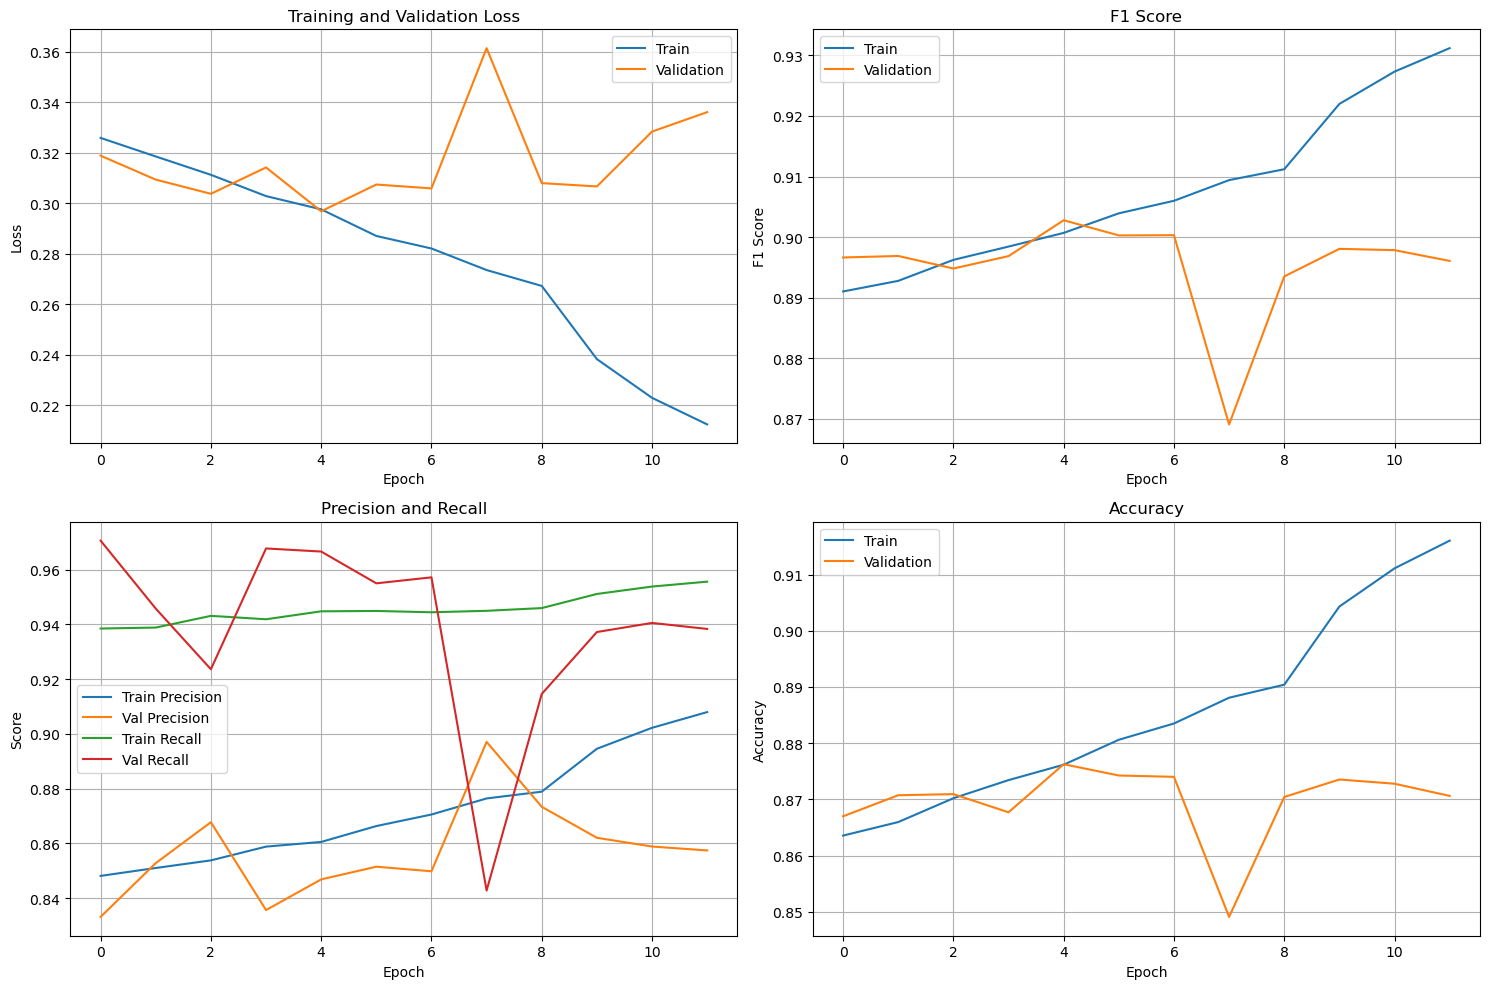


FINAL EVALUATION (BEST MODEL)

Best Model Performance:
  Validation Loss: 0.2968
  Accuracy:  0.8763
  Precision: 0.8469
  Recall:    0.9666
  F1 Score:  0.9028

Confusion Matrix:
  TN: 7,645 | FP: 2,634
  FN: 503 | TP: 14,568

✓ TRAINING PIPELINE COMPLETE!


In [65]:
# Training loop for Hybrid Gene Predictor

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from pathlib import Path
import time

# =============================================================================
# TRAINING UTILITIES
# =============================================================================

def calculate_metrics(predictions, labels, threshold=0.5):
    """Calculate classification metrics."""
    preds_binary = (predictions > threshold).astype(int)
    labels_binary = labels.astype(int)
    
    acc = accuracy_score(labels_binary, preds_binary)
    prec = precision_score(labels_binary, preds_binary, zero_division=0)
    rec = recall_score(labels_binary, preds_binary, zero_division=0)
    f1 = f1_score(labels_binary, preds_binary, zero_division=0)
    
    return {
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1': f1
    }


def train_epoch(model, train_loader, criterion, optimizer, device):
    """Train for one epoch."""
    model.train()
    
    running_loss = 0.0
    all_predictions = []
    all_labels = []
    
    for batch_idx, (sequences, features, labels) in enumerate(train_loader):
        # Move to device
        sequences = sequences.to(device)
        features = features.to(device)
        labels = labels.to(device)
        
        # Forward pass
        optimizer.zero_grad()
        outputs = model(sequences, features)
        loss = criterion(outputs, labels)
        
        # Backward pass
        loss.backward()
        optimizer.step()
        
        # Track metrics
        running_loss += loss.item()
        all_predictions.extend(outputs.detach().cpu().numpy())
        all_labels.extend(labels.detach().cpu().numpy())
        
        # Print progress
        if (batch_idx + 1) % 100 == 0:
            print(f"  Batch {batch_idx + 1}/{len(train_loader)}, Loss: {loss.item():.4f}")
    
    # Calculate epoch metrics
    avg_loss = running_loss / len(train_loader)
    metrics = calculate_metrics(np.array(all_predictions), np.array(all_labels))
    
    return avg_loss, metrics


def validate_epoch(model, val_loader, criterion, device):
    """Validate for one epoch."""
    model.eval()
    
    running_loss = 0.0
    all_predictions = []
    all_labels = []
    
    with torch.no_grad():
        for sequences, features, labels in val_loader:
            # Move to device
            sequences = sequences.to(device)
            features = features.to(device)
            labels = labels.to(device)
            
            # Forward pass
            outputs = model(sequences, features)
            loss = criterion(outputs, labels)
            
            # Track metrics
            running_loss += loss.item()
            all_predictions.extend(outputs.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    # Calculate metrics
    avg_loss = running_loss / len(val_loader)
    metrics = calculate_metrics(np.array(all_predictions), np.array(all_labels))
    
    return avg_loss, metrics, np.array(all_predictions), np.array(all_labels)


def plot_training_history(history, save_path=None):
    """Plot training history."""
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Loss
    axes[0, 0].plot(history['train_loss'], label='Train')
    axes[0, 0].plot(history['val_loss'], label='Validation')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Loss')
    axes[0, 0].set_title('Training and Validation Loss')
    axes[0, 0].legend()
    axes[0, 0].grid(True)
    
    # F1 Score
    axes[0, 1].plot(history['train_f1'], label='Train')
    axes[0, 1].plot(history['val_f1'], label='Validation')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('F1 Score')
    axes[0, 1].set_title('F1 Score')
    axes[0, 1].legend()
    axes[0, 1].grid(True)
    
    # Precision & Recall
    axes[1, 0].plot(history['train_precision'], label='Train Precision')
    axes[1, 0].plot(history['val_precision'], label='Val Precision')
    axes[1, 0].plot(history['train_recall'], label='Train Recall')
    axes[1, 0].plot(history['val_recall'], label='Val Recall')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Score')
    axes[1, 0].set_title('Precision and Recall')
    axes[1, 0].legend()
    axes[1, 0].grid(True)
    
    # Accuracy
    axes[1, 1].plot(history['train_accuracy'], label='Train')
    axes[1, 1].plot(history['val_accuracy'], label='Validation')
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('Accuracy')
    axes[1, 1].set_title('Accuracy')
    axes[1, 1].legend()
    axes[1, 1].grid(True)
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=150, bbox_inches='tight')
        print(f"  Saved plot to {save_path}")
    
    plt.show()


# =============================================================================
# MAIN TRAINING LOOP
# =============================================================================
# =============================================================================
# SETUP (FIXED)
# =============================================================================

print("="*80)
print("TRAINING HYBRID GENE PREDICTOR")
print("="*80)

# Setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"\nDevice: {device}")

# Move model to device
model = model.to(device)

# Loss and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

# Learning rate scheduler (FIXED - removed verbose)
scheduler = ReduceLROnPlateau(
    optimizer, 
    mode='min', 
    factor=0.5, 
    patience=3
)

# Training parameters
num_epochs = 30
early_stopping_patience = 7
best_val_f1 = 0.0
patience_counter = 0

# Create checkpoint directory
checkpoint_dir = Path.cwd().parent / "models" / "hybrid_dl"
checkpoint_dir.mkdir(parents=True, exist_ok=True)

# Training history
history = {
    'train_loss': [], 'val_loss': [],
    'train_accuracy': [], 'val_accuracy': [],
    'train_precision': [], 'val_precision': [],
    'train_recall': [], 'val_recall': [],
    'train_f1': [], 'val_f1': []
}

print(f"\nTraining Configuration:")
print(f"  Epochs: {num_epochs}")
print(f"  Batch size: {batch_size}")
print(f"  Learning rate: 0.001")
print(f"  Early stopping patience: {early_stopping_patience}")
print(f"  Model checkpoint: {checkpoint_dir}")

# Training loop
print(f"\n{'='*80}")
print(f"STARTING TRAINING")
print(f"{'='*80}\n")

start_time = time.time()

for epoch in range(num_epochs):
    epoch_start = time.time()
    
    print(f"Epoch {epoch + 1}/{num_epochs}")
    print("-" * 80)
    
    # Train
    train_loss, train_metrics = train_epoch(
        model, train_loader, criterion, optimizer, device
    )
    
    # Validate
    val_loss, val_metrics, val_preds, val_labels = validate_epoch(
        model, val_loader, criterion, device
    )
    
    # Learning rate scheduling
    current_lr = optimizer.param_groups[0]['lr']
    scheduler.step(val_loss)
    new_lr = optimizer.param_groups[0]['lr']
    
    # Check if LR was reduced
    if new_lr < current_lr:
        print(f"  Learning rate reduced: {current_lr:.6f} → {new_lr:.6f}")
    
    # Store history
    history['train_loss'].append(train_loss)
    history['val_loss'].append(val_loss)
    history['train_accuracy'].append(train_metrics['accuracy'])
    history['val_accuracy'].append(val_metrics['accuracy'])
    history['train_precision'].append(train_metrics['precision'])
    history['val_precision'].append(val_metrics['precision'])
    history['train_recall'].append(train_metrics['recall'])
    history['val_recall'].append(val_metrics['recall'])
    history['train_f1'].append(train_metrics['f1'])
    history['val_f1'].append(val_metrics['f1'])
    
    # Print epoch summary
    epoch_time = time.time() - epoch_start
    
    print(f"\n  Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")
    print(f"  Train Acc:  {train_metrics['accuracy']:.4f} | Val Acc:  {val_metrics['accuracy']:.4f}")
    print(f"  Train Prec: {train_metrics['precision']:.4f} | Val Prec: {val_metrics['precision']:.4f}")
    print(f"  Train Rec:  {train_metrics['recall']:.4f} | Val Rec:  {val_metrics['recall']:.4f}")
    print(f"  Train F1:   {train_metrics['f1']:.4f} | Val F1:   {val_metrics['f1']:.4f}")
    print(f"  Time: {epoch_time:.1f}s | LR: {new_lr:.6f}")
    
    # Save best model
    if val_metrics['f1'] > best_val_f1:
        best_val_f1 = val_metrics['f1']
        patience_counter = 0
        
        checkpoint_path = checkpoint_dir / "best_model.pt"
        torch.save({
            'epoch': epoch + 1,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'val_f1': best_val_f1,
            'history': history
        }, checkpoint_path)
        
        print(f"  ✓ New best F1: {best_val_f1:.4f} - Model saved!")
    else:
        patience_counter += 1
        print(f"  Early stopping: {patience_counter}/{early_stopping_patience}")
    
    print()
    
    # Early stopping
    if patience_counter >= early_stopping_patience:
        print(f"Early stopping triggered after {epoch + 1} epochs")
        break

# Training complete
total_time = time.time() - start_time

print("="*80)
print("TRAINING COMPLETE!")
print("="*80)
print(f"\nTotal time: {total_time/60:.1f} minutes")
print(f"Best validation F1: {best_val_f1:.4f}")
print(f"Model saved to: {checkpoint_dir / 'best_model.pt'}")

# Plot training history
print(f"\n{'='*80}")
print(f"TRAINING HISTORY")
print(f"{'='*80}")

plot_path = checkpoint_dir / "training_history.png"
plot_training_history(history, save_path=plot_path)

# Load best model for final evaluation
print(f"\n{'='*80}")
print(f"FINAL EVALUATION (BEST MODEL)")
print(f"{'='*80}")

checkpoint = torch.load(checkpoint_dir / "best_model.pt")
model.load_state_dict(checkpoint['model_state_dict'])

val_loss, val_metrics, val_preds, val_labels = validate_epoch(
    model, val_loader, criterion, device
)

print(f"\nBest Model Performance:")
print(f"  Validation Loss: {val_loss:.4f}")
print(f"  Accuracy:  {val_metrics['accuracy']:.4f}")
print(f"  Precision: {val_metrics['precision']:.4f}")
print(f"  Recall:    {val_metrics['recall']:.4f}")
print(f"  F1 Score:  {val_metrics['f1']:.4f}")

# Confusion matrix
cm = confusion_matrix((val_labels > 0.5).astype(int), (val_preds > 0.5).astype(int))
print(f"\nConfusion Matrix:")
print(f"  TN: {cm[0,0]:,} | FP: {cm[0,1]:,}")
print(f"  FN: {cm[1,0]:,} | TP: {cm[1,1]:,}")

print(f"\n{'='*80}")
print(f"✓ TRAINING PIPELINE COMPLETE!")
print(f"{'='*80}")